In [41]:
# Cài đặt các thư viện cần thiết
%pip install numpy pandas matplotlib seaborn scikit-learn


In [42]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import os

# Cài đặt style cho biểu đồ
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')
plt.rcParams['figure.figsize'] = (12, 8)
%matplotlib inline

# Tạo thư mục để lưu trữ dữ liệu và hình ảnh
if not os.path.exists('processed_data'):
    os.makedirs('processed_data')
if not os.path.exists('visualizations'):
    os.makedirs('visualizations')


In [43]:
# Định nghĩa hàm đọc và khám phá dữ liệu
def load_and_explore_data(file_path):
    """
    Đọc file dữ liệu CSV và hiển thị thông tin cơ bản
    """
    print(f"Đọc file: {file_path}")
    df = pd.read_csv(file_path)

    print(f"Kích thước dữ liệu: {df.shape}")
    print("\nThông tin cơ bản:")
    print(df.info())
    print("\nThống kê mô tả:")
    display(df.describe())
    print("\nKiểm tra giá trị thiếu:")
    print(df.isnull().sum())
    print("\n5 dòng đầu tiên:")
    display(df.head())

    return df


In [44]:
# Tải dữ liệu từ Google Colab
from google.colab import files

print("Vui lòng tải lên tập dữ liệu bệnh tim (heart.csv, heart_disease_uci.csv và heart_cleveland_upload.csv)")
uploaded = files.upload()

# Đọc và khám phá từng tập dữ liệu
heart_df = load_and_explore_data('heart.csv')
cleveland_df = load_and_explore_data('heart_cleveland_upload.csv')
uci_df = load_and_explore_data('heart_disease_uci.csv')


Vui lòng tải lên tập dữ liệu bệnh tim (heart.csv, heart_disease_uci.csv và heart_cleveland_upload.csv)


Saving heart.csv to heart.csv
Saving heart_cleveland_upload.csv to heart_cleveland_upload.csv
Saving heart_disease_uci.csv to heart_disease_uci.csv
Đọc file: heart.csv
Kích thước dữ liệu: (1025, 14)

Thông tin cơ bản:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 K

age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000     0.000000     0.000000   
25%       0.000000     0.000000   132.000000     0.000000     0.000000   
50%       0.000000     1.000000   152.000000     0.000000     0.800000   
75%       0.000000     1.000000   166.000000     1.000000     1.800000   
max       1.000000     2.000000   202.000000     1.000000     6.200000   

             slope           ca         thal       target  
count  1025.000000  1025.000000  1025.000000  1025.000000  
mean      1.385366     0.754146     2.323902     0.513171  
std       0.617755     1.030798     0.620660     0.500070  
min       0.000000     0.000000     0.000000     0.000000  
25%       1.000000     0.000000     2.000000     0.000000  
50%       1.000000     0.000000     2.000000     1.000000  
75%       2.000000     1.000000     3.000000     1.000000  
max       2.000000     4.000000     3.000000     1.000000


Kiểm tra giá trị thiếu:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

5 dòng đầu tiên:


age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

Đọc file: heart_cleveland_upload.csv
Kích thước dữ liệu: (297, 14)

Thông tin cơ bản:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB
None

Thống kê mô tả:


age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088    0.676768    2.158249  131.693603  247.350168    0.144781   
std      9.049736    0.468500    0.964859   17.762806   51.997583    0.352474   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    2.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    2.000000  130.000000  243.000000    0.000000   
75%     61.000000    1.000000    3.000000  140.000000  276.000000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean     0.996633  149.599327    0.326599    1.055556    0.602694    0.676768   
std      0.994914   22.941562    0.469761    1.166123    0.618187    0.938965   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.000000    0.000000    0.000000    0.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      2.000000  166.000000    1.000000    1.600000    1.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    3.000000   

             thal   condition  
count  297.000000  297.000000  
mean     0.835017    0.461279  
std      0.956690    0.499340  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    0.000000  
75%      2.000000    1.000000  
max      2.000000    1.000000


Kiểm tra giá trị thiếu:
age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

5 dòng đầu tiên:


age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0

Đọc file: heart_disease_uci.csv
Kích thước dữ liệu: (920, 16)

Thông tin cơ bản:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB
None

Thống kê mô tả:


id         age    trestbps        chol      thalch     oldpeak  \
count  920.000000  920.000000  861.000000  890.000000  865.000000  858.000000   
mean   460.500000   53.510870  132.132404  199.130337  137.545665    0.878788   
std    265.725422    9.424685   19.066070  110.780810   25.926276    1.091226   
min      1.000000   28.000000    0.000000    0.000000   60.000000   -2.600000   
25%    230.750000   47.000000  120.000000  175.000000  120.000000    0.000000   
50%    460.500000   54.000000  130.000000  223.000000  140.000000    0.500000   
75%    690.250000   60.000000  140.000000  268.000000  157.000000    1.500000   
max    920.000000   77.000000  200.000000  603.000000  202.000000    6.200000   

               ca         num  
count  309.000000  920.000000  
mean     0.676375    0.995652  
std      0.935653    1.142693  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    1.000000  
75%      1.000000    2.000000  
max      3.000000    4.000000


Kiểm tra giá trị thiếu:
id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

5 dòng đầu tiên:


id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0

Biểu đồ Histogram cho tập dữ liệu Heart:


/tmp/ipython-input-45-1920387873.py:83: UserWarning: Glyph 7847 (\N{LATIN SMALL LETTER A WITH CIRCUMFLEX AND GRAVE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-45-1920387873.py:83: UserWarning: Glyph 7845 (\N{LATIN SMALL LETTER A WITH CIRCUMFLEX AND ACUTE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-45-1920387873.py:83: UserWarning: Glyph 7889 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX AND ACUTE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-45-1920387873.py:83: UserWarning: Glyph 7911 (\N{LATIN SMALL LETTER U WITH HOOK ABOVE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-45-1920387873.py:85: UserWarning: Glyph 7889 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX AND ACUTE}) missing from font(s) Liberation Sans.
  plt.savefig(f'visualizations/{dataset_name}_histograms.png')
/tmp/ipython-input-45-1920387873.py:85: UserWarning: Glyph 7863 (\N{LATIN SMALL LETTER A

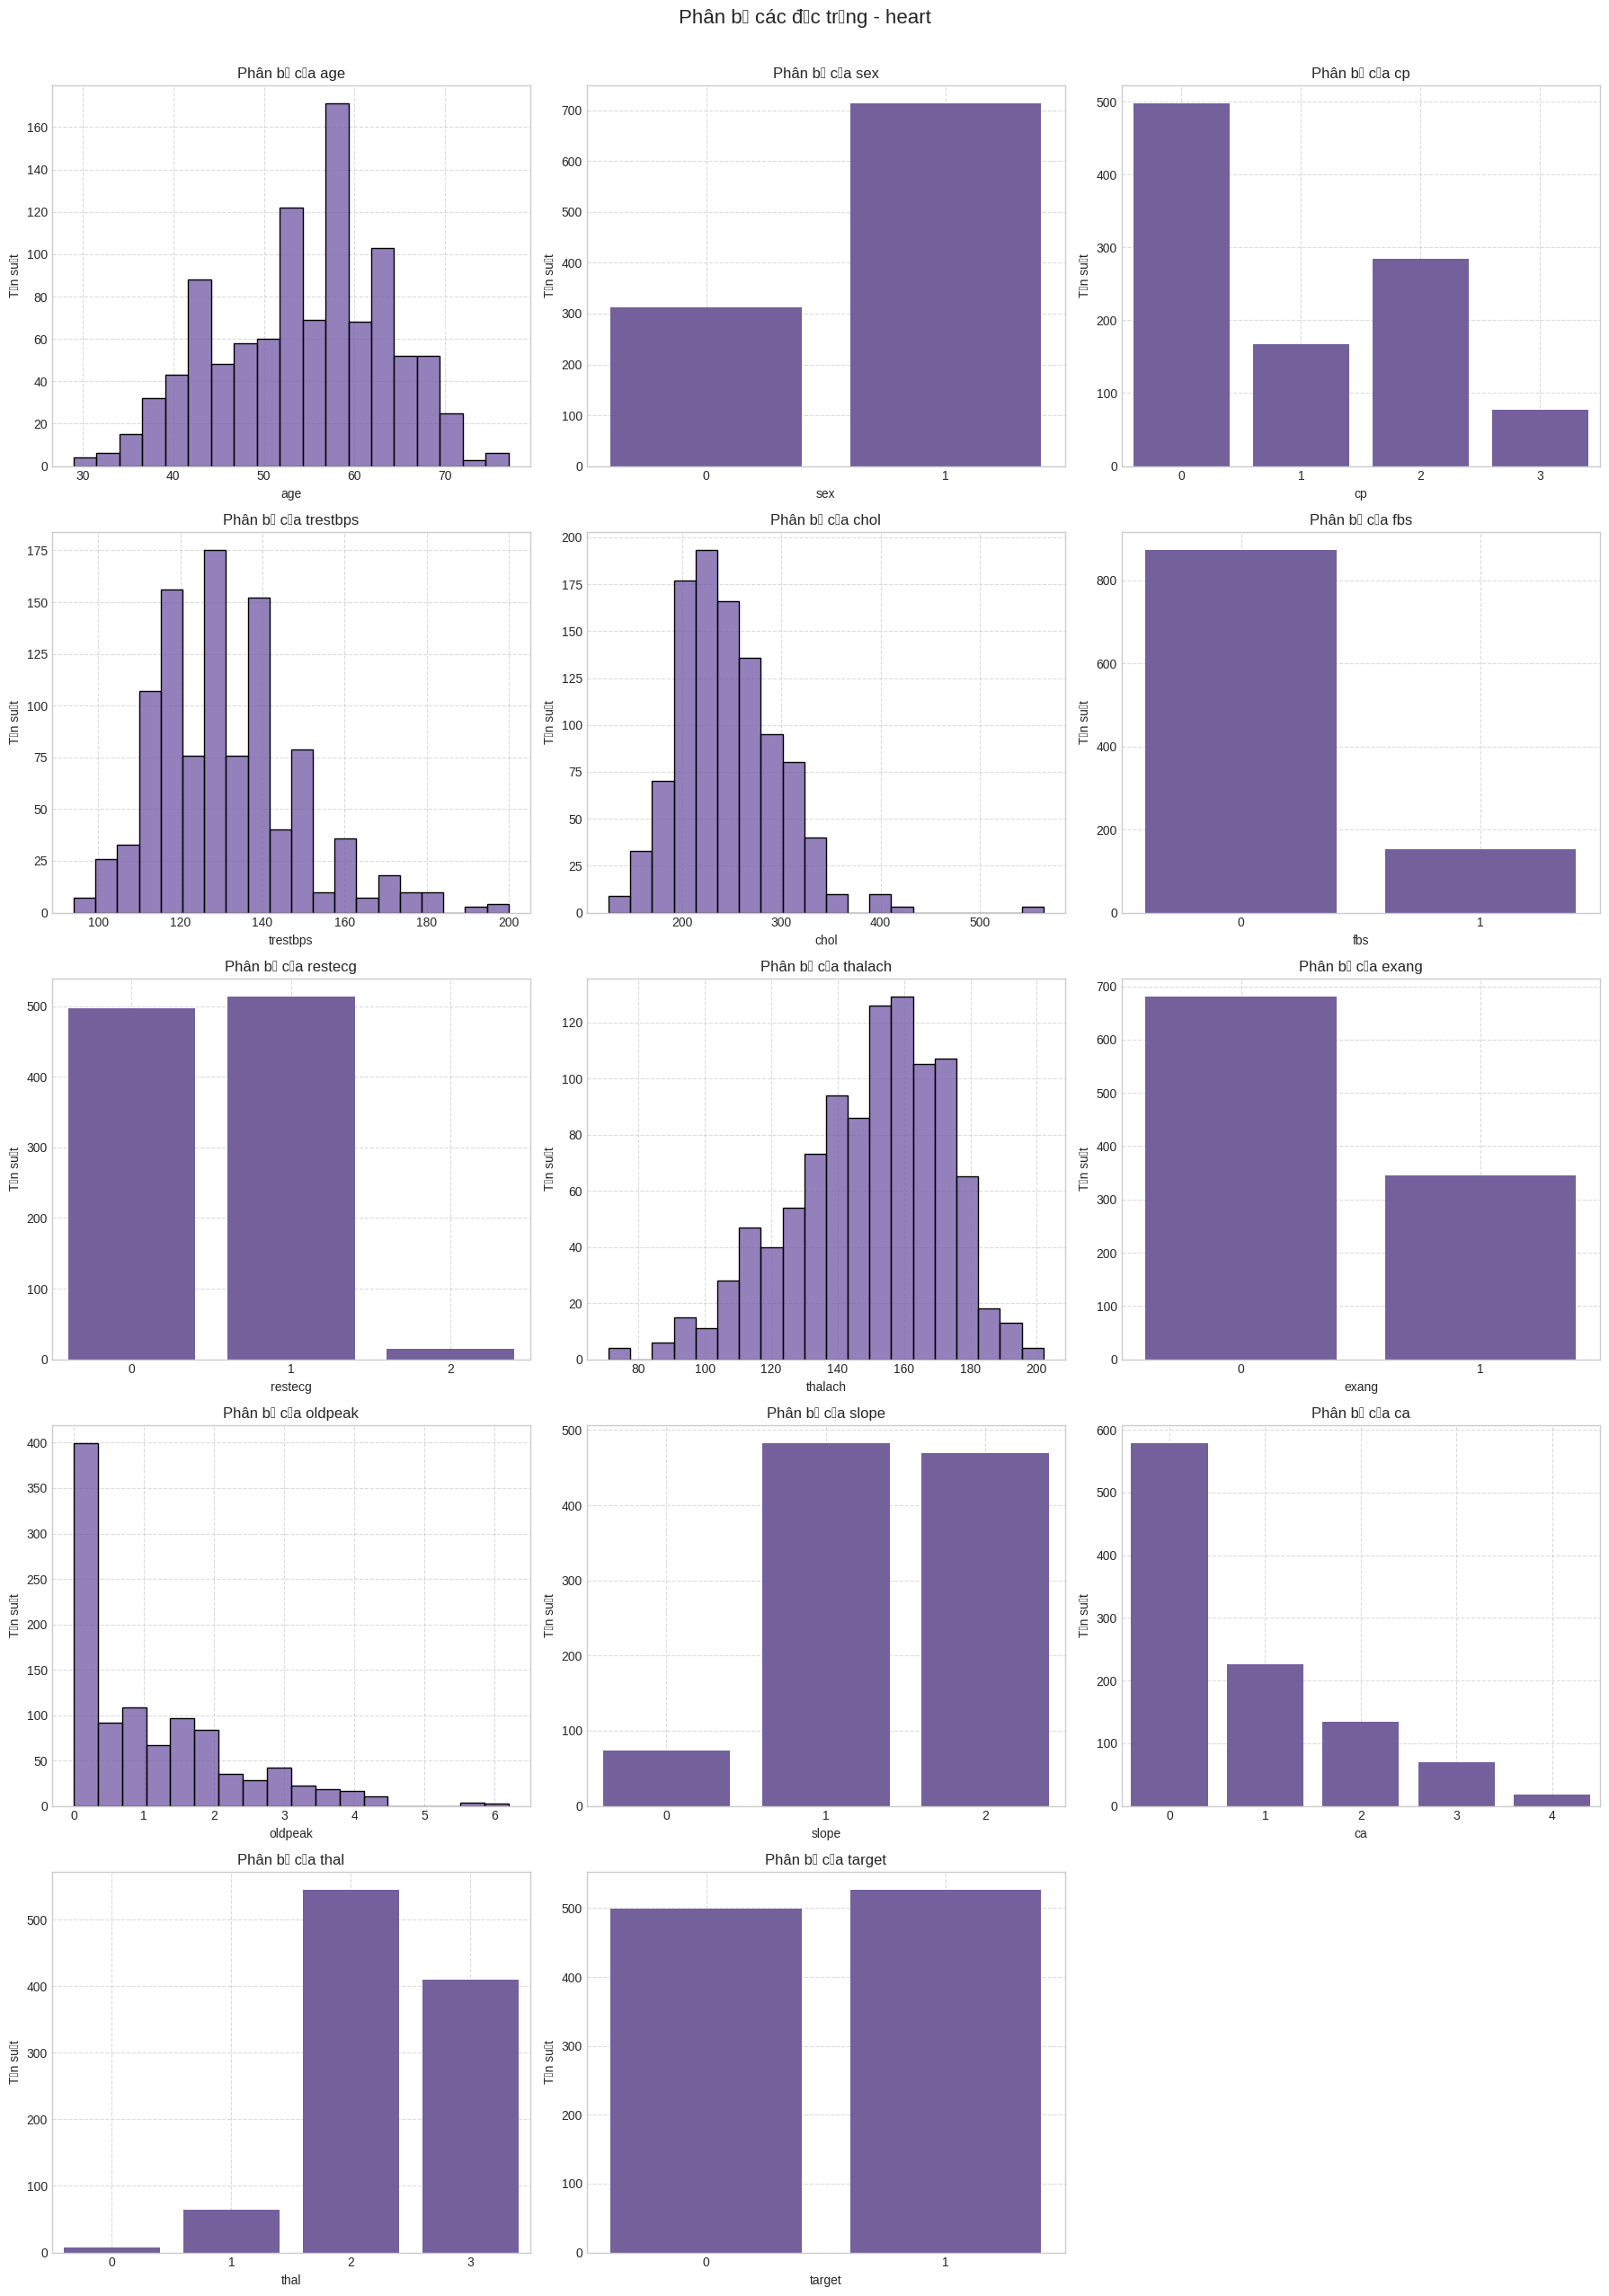

In [45]:
### 2.1 Hiển thị phân bố các đặc trưng bằng Histogram

def plot_histograms(df, dataset_name):
    """
    Vẽ histogram cho các đặc trưng số
    """
    # Lấy danh sách các cột số
    numeric_features = df.select_dtypes(include=['int64', 'float64']).columns

    # Bỏ qua việc vẽ histogram cho tập dữ liệu UCI
    if dataset_name.lower() == 'uci':
        print("Bỏ qua việc vẽ histogram cho tập dữ liệu UCI theo yêu cầu.")
        return

    # Xác định các cột rời rạc (categorical)
    categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

    # Tạo lưới biểu đồ
    n_features = len(numeric_features)
    n_cols = 3
    n_rows = (n_features + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 5))
    axes = axes.flatten()

    # Vẽ histogram cho từng đặc trưng
    for i, feature in enumerate(numeric_features):
        # Kiểm tra xem đặc trưng có phải là rời rạc không
        is_categorical = feature in categorical_cols

        # Lấy các giá trị thực tế trong dữ liệu
        min_val = df[feature].min()
        max_val = df[feature].max()

        if is_categorical:
            # Xác định các giá trị duy nhất có trong dữ liệu
            unique_values = sorted(df[feature].unique())

            # Đếm tần suất của từng giá trị
            value_counts = df[feature].value_counts().sort_index()

            # Vẽ bar plot thay vì histogram để hiển thị chính xác các giá trị
            sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[i], color='#7156a5')

            # Đảm bảo trục x chỉ hiển thị các giá trị thực tế
            axes[i].set_xticks(range(len(unique_values)))
            axes[i].set_xticklabels(unique_values)

            # Đặt giới hạn trục x để không hiển thị giá trị ngoài dữ liệu
            axes[i].set_xlim(-0.5, len(unique_values) - 0.5)
        else:
            # Tính toán số khoảng hợp lý dựa trên dữ liệu
            # Đối với dữ liệu liên tục, sử dụng bins trong phạm vi dữ liệu thực tế
            range_val = max_val - min_val

            if range_val == 0:  # Trường hợp tất cả giá trị giống nhau
                bins = [min_val - 0.5, min_val + 0.5]
            else:
                # Tính số bins hợp lý dựa trên quy tắc Freedman-Diaconis
                iqr = np.percentile(df[feature], 75) - np.percentile(df[feature], 25)
                bin_width = 2 * iqr / (len(df) ** (1/3)) if iqr > 0 else range_val / 10
                num_bins = max(5, min(20, int(np.ceil(range_val / bin_width))))
                bins = np.linspace(min_val, max_val, num_bins + 1)

            # Vẽ histogram với bins được xác định từ dữ liệu thực tế
            sns.histplot(df[feature], bins=bins, kde=False, ax=axes[i], color='#7156a5')

            # Thêm buffer nhỏ để hiển thị đẹp hơn
            buffer = range_val * 0.05 if range_val > 0 else 0.5
            axes[i].set_xlim(min_val - buffer, max_val + buffer)

        axes[i].set_title(f'Phân bố của {feature}')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Tần suất')

        # Thêm grid để dễ đọc hơn
        axes[i].grid(True, linestyle='--', alpha=0.7)

    # Ẩn các trục thừa
    for i in range(n_features, len(axes)):
        axes[i].set_visible(False)

    plt.tight_layout()
    plt.suptitle(f'Phân bố các đặc trưng - {dataset_name}', fontsize=16, y=1.02)
    plt.savefig(f'visualizations/{dataset_name}_histograms.png')
    plt.show()

# Vẽ histogram cho từng tập dữ liệu
print("Biểu đồ Histogram cho tập dữ liệu Heart:")
plot_histograms(heart_df, 'heart')


Biểu đồ Histogram cho tập dữ liệu Cleveland:


/tmp/ipython-input-45-1920387873.py:83: UserWarning: Glyph 7847 (\N{LATIN SMALL LETTER A WITH CIRCUMFLEX AND GRAVE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-45-1920387873.py:83: UserWarning: Glyph 7845 (\N{LATIN SMALL LETTER A WITH CIRCUMFLEX AND ACUTE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-45-1920387873.py:83: UserWarning: Glyph 7889 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX AND ACUTE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-45-1920387873.py:83: UserWarning: Glyph 7911 (\N{LATIN SMALL LETTER U WITH HOOK ABOVE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-45-1920387873.py:85: UserWarning: Glyph 7889 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX AND ACUTE}) missing from font(s) Liberation Sans.
  plt.savefig(f'visualizations/{dataset_name}_histograms.png')
/tmp/ipython-input-45-1920387873.py:85: UserWarning: Glyph 7863 (\N{LATIN SMALL LETTER A

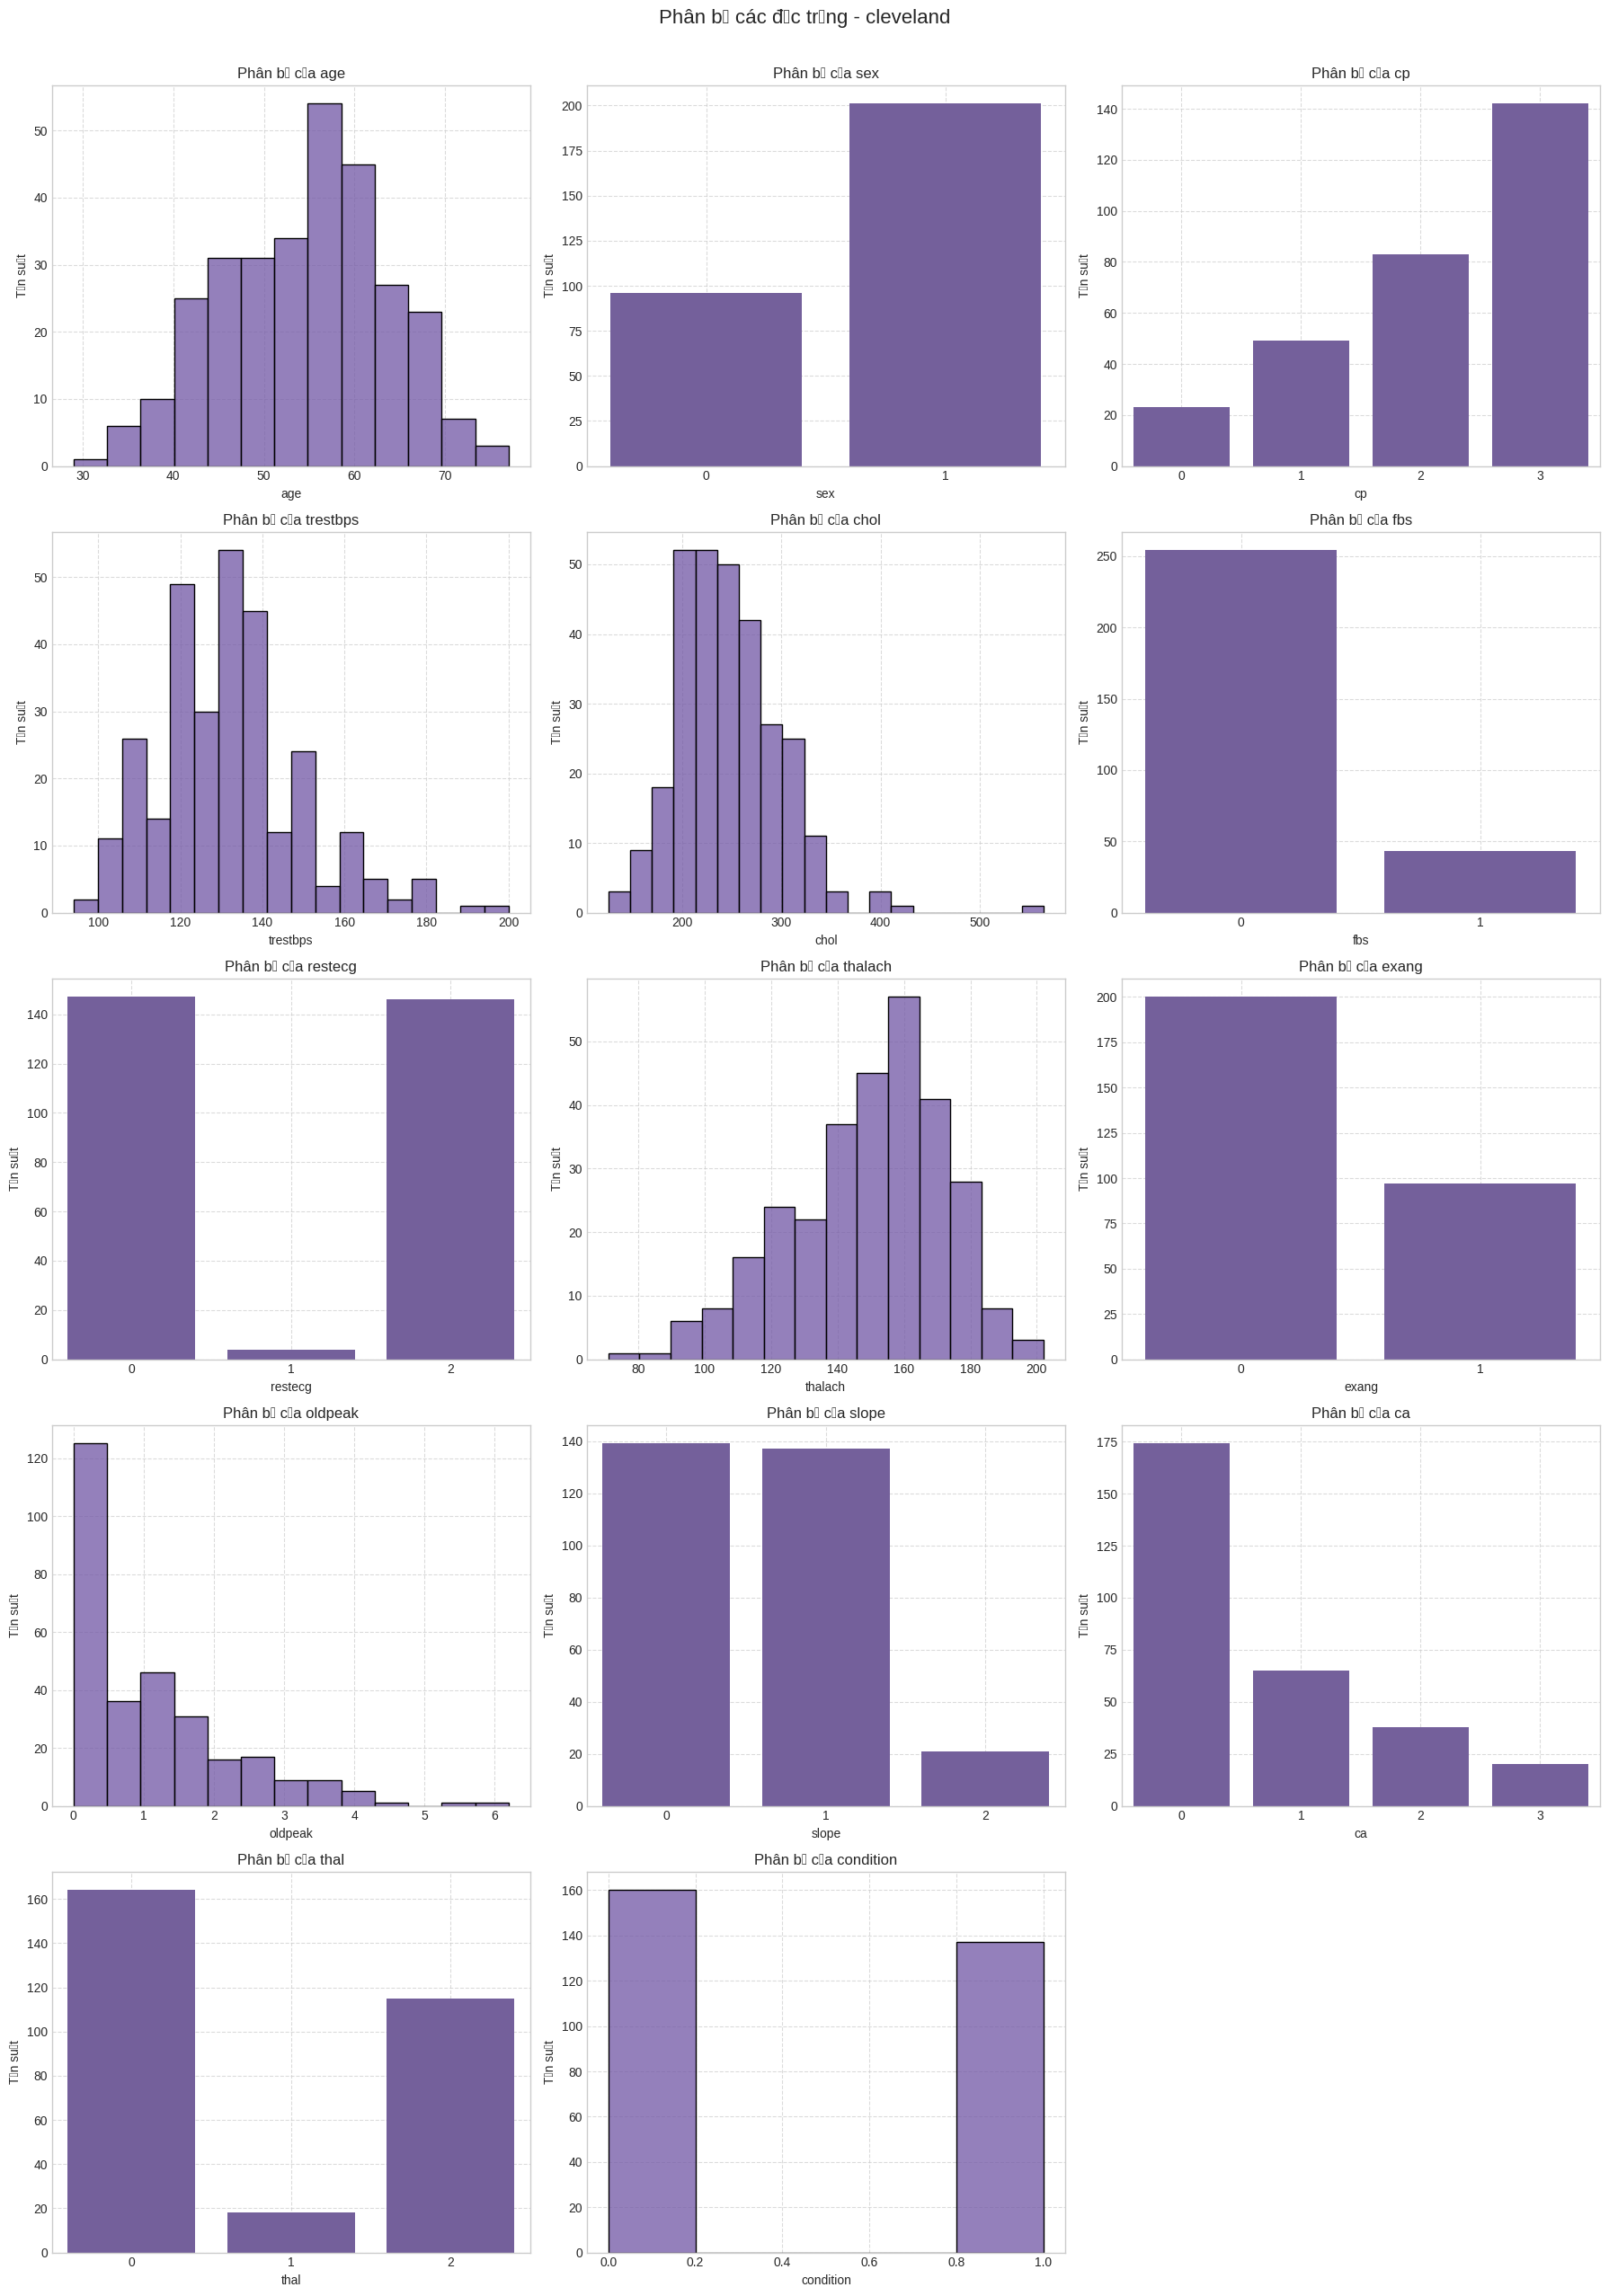

In [46]:
print("Biểu đồ Histogram cho tập dữ liệu Cleveland:")
plot_histograms(cleveland_df, 'cleveland')


In [47]:
print("Biểu đồ Histogram cho tập dữ liệu UCI:")
plot_histograms(uci_df, 'uci')


Biểu đồ Histogram cho tập dữ liệu UCI:
Bỏ qua việc vẽ histogram cho tập dữ liệu UCI theo yêu cầu.


Biểu đồ Scatter cho tập dữ liệu Heart:


/tmp/ipython-input-48-3317707770.py:64: UserWarning: Glyph 7879 (\N{LATIN SMALL LETTER E WITH CIRCUMFLEX AND DOT BELOW}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-48-3317707770.py:66: UserWarning: Glyph 7889 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX AND ACUTE}) missing from font(s) Liberation Sans.
  plt.savefig(f'visualizations/{dataset_name}_scatter_plots.png')
/tmp/ipython-input-48-3317707770.py:66: UserWarning: Glyph 7879 (\N{LATIN SMALL LETTER E WITH CIRCUMFLEX AND DOT BELOW}) missing from font(s) Liberation Sans.
  plt.savefig(f'visualizations/{dataset_name}_scatter_plots.png')
/tmp/ipython-input-48-3317707770.py:66: UserWarning: Glyph 7919 (\N{LATIN SMALL LETTER U WITH HORN AND TILDE}) missing from font(s) Liberation Sans.
  plt.savefig(f'visualizations/{dataset_name}_scatter_plots.png')
/tmp/ipython-input-48-3317707770.py:66: UserWarning: Glyph 7863 (\N{LATIN SMALL LETTER A WITH BREVE AND DOT BELOW}) missing from font(s) Liberation Sans.
  plt

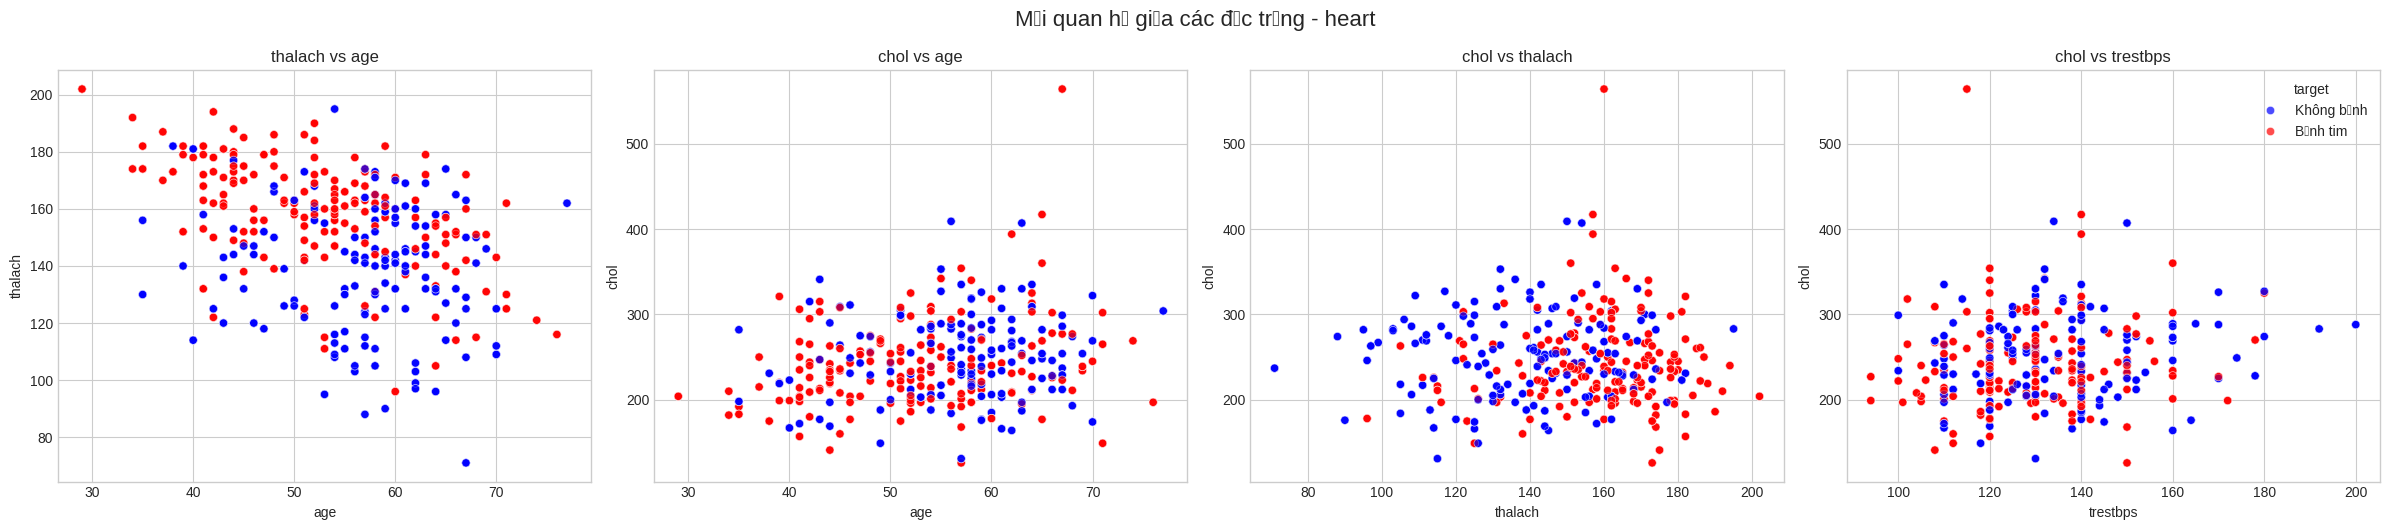

In [48]:
### 2.2 Phân tích mối quan hệ giữa các đặc trưng bằng Scatter Plot

def plot_scatter_relationships(df, dataset_name):
    """
    Vẽ scatter plots giữa các cặp đặc trưng quan trọng
    """
    # Lựa chọn một số đặc trưng quan trọng
    key_features = []

    # Xác định đặc trưng đích
    target_col = 'target' if 'target' in df.columns else 'condition'

    # Xác định các đặc trưng số quan trọng dựa trên tập dữ liệu
    if 'age' in df.columns and 'thalach' in df.columns:
        key_features.append(('age', 'thalach'))

    if 'age' in df.columns and 'chol' in df.columns:
        key_features.append(('age', 'chol'))

    if 'thalach' in df.columns and 'chol' in df.columns:
        key_features.append(('thalach', 'chol'))

    if 'trestbps' in df.columns and 'chol' in df.columns:
        key_features.append(('trestbps', 'chol'))

    if len(key_features) == 0:
        print(f"Không tìm thấy các cặp đặc trưng phù hợp trong tập dữ liệu {dataset_name}")
        return

    # Vẽ scatter plots
    fig, axes = plt.subplots(1, len(key_features), figsize=(6*len(key_features), 5))
    if len(key_features) == 1:
        axes = [axes]

    # Thiết lập các nhãn và màu cố định cho [0,1]
    labels = ['Không bệnh', 'Bệnh tim']
    colors = ['blue', 'red']

    for i, (x_feature, y_feature) in enumerate(key_features):
        # Đảm bảo hue sử dụng giá trị nhị phân [0, 1]
        scatter = sns.scatterplot(
            data=df,
            x=x_feature,
            y=y_feature,
            hue=target_col,
            palette={0: colors[0], 1: colors[1]},
            alpha=0.7,
            ax=axes[i]
        )
        axes[i].set_title(f'{y_feature} vs {x_feature}')
        axes[i].set_xlabel(x_feature)
        axes[i].set_ylabel(y_feature)

        # Chỉ hiển thị legend cho biểu đồ cuối cùng
        if i != len(key_features) - 1:
            if hasattr(scatter, 'legend_') and scatter.legend_:
                scatter.legend_.remove()
        else:
            # Đặt legend cho biểu đồ cuối cùng với các nhãn đã chỉ định
            handles, _ = scatter.get_legend_handles_labels()
            if len(handles) >= 2:  # Đảm bảo đủ nhãn
                axes[i].legend(handles[:2], labels, title=target_col)

    plt.tight_layout()
    plt.suptitle(f'Mối quan hệ giữa các đặc trưng - {dataset_name}', fontsize=16, y=1.05)
    plt.savefig(f'visualizations/{dataset_name}_scatter_plots.png')
    plt.show()

# Vẽ scatter plots cho từng tập dữ liệu
print("Biểu đồ Scatter cho tập dữ liệu Heart:")
plot_scatter_relationships(heart_df, 'heart')


Biểu đồ Scatter cho tập dữ liệu Cleveland:


/tmp/ipython-input-48-3317707770.py:64: UserWarning: Glyph 7879 (\N{LATIN SMALL LETTER E WITH CIRCUMFLEX AND DOT BELOW}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-48-3317707770.py:66: UserWarning: Glyph 7889 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX AND ACUTE}) missing from font(s) Liberation Sans.
  plt.savefig(f'visualizations/{dataset_name}_scatter_plots.png')
/tmp/ipython-input-48-3317707770.py:66: UserWarning: Glyph 7879 (\N{LATIN SMALL LETTER E WITH CIRCUMFLEX AND DOT BELOW}) missing from font(s) Liberation Sans.
  plt.savefig(f'visualizations/{dataset_name}_scatter_plots.png')
/tmp/ipython-input-48-3317707770.py:66: UserWarning: Glyph 7919 (\N{LATIN SMALL LETTER U WITH HORN AND TILDE}) missing from font(s) Liberation Sans.
  plt.savefig(f'visualizations/{dataset_name}_scatter_plots.png')
/tmp/ipython-input-48-3317707770.py:66: UserWarning: Glyph 7863 (\N{LATIN SMALL LETTER A WITH BREVE AND DOT BELOW}) missing from font(s) Liberation Sans.
  plt

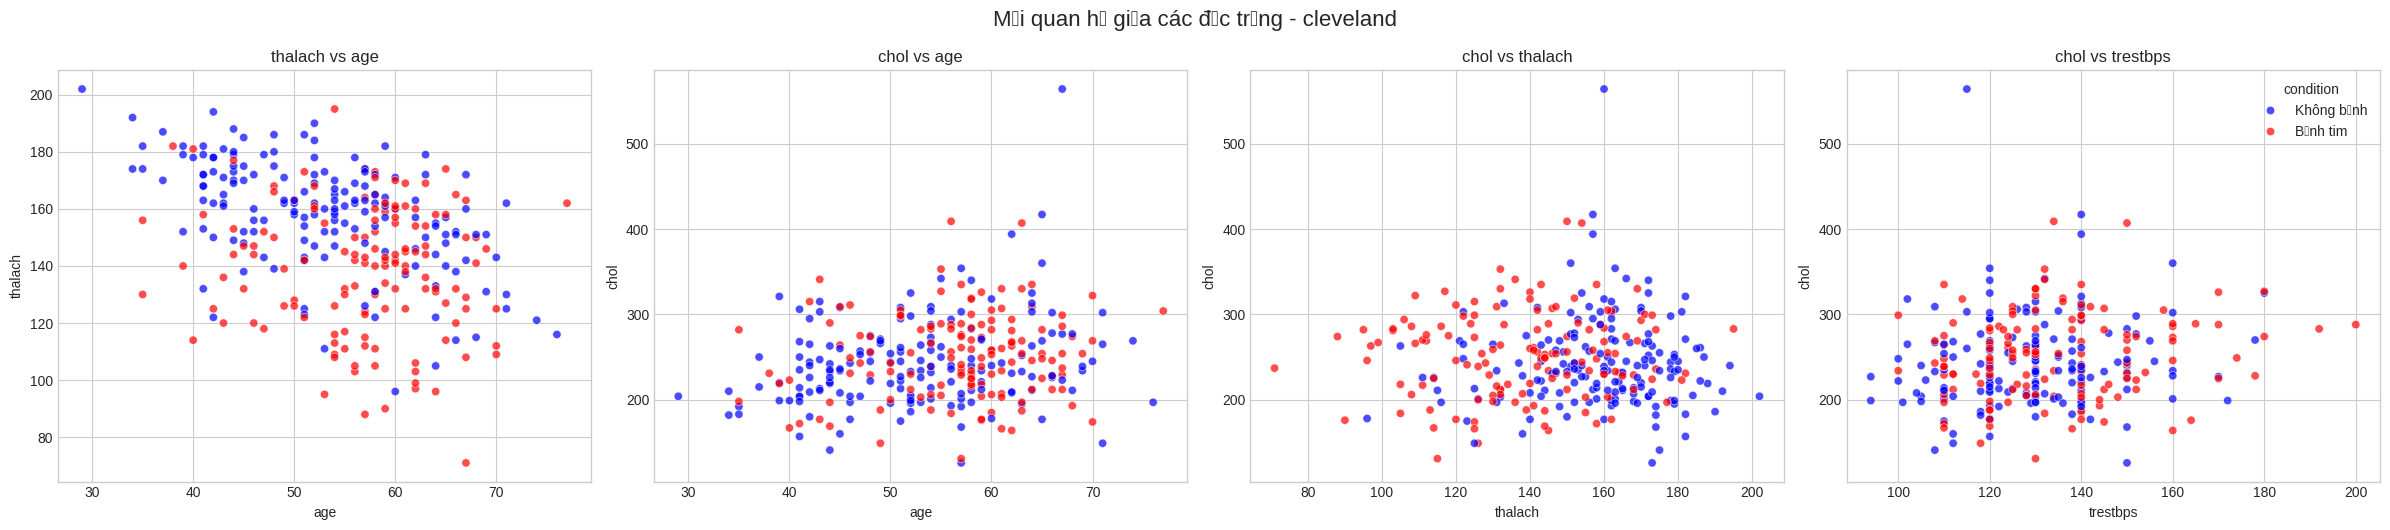

In [49]:
print("Biểu đồ Scatter cho tập dữ liệu Cleveland:")
plot_scatter_relationships(cleveland_df, 'cleveland')


Biểu đồ Scatter cho tập dữ liệu UCI:
Đang xử lý dữ liệu UCI...
Đang xử lý giá trị thiếu...
Đã xử lý giá trị thiếu trong 8 cột phân loại
Đã tạo cột 'target' từ cột 'num' và chuyển về dạng nhị phân (0/1)
Đã loại bỏ cột 'id'
Đang mã hóa 8 biến phân loại...

Số lượng mẫu: 920
Số lượng đặc trưng: 21
Phân bố nhãn: {1: 509, 0: 411}


/tmp/ipython-input-50-216113671.py:117: UserWarning: Glyph 7879 (\N{LATIN SMALL LETTER E WITH CIRCUMFLEX AND DOT BELOW}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-50-216113671.py:119: UserWarning: Glyph 7889 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX AND ACUTE}) missing from font(s) Liberation Sans.
  plt.savefig(f'visualizations/{dataset_name}_scatter_plots.png')
/tmp/ipython-input-50-216113671.py:119: UserWarning: Glyph 7879 (\N{LATIN SMALL LETTER E WITH CIRCUMFLEX AND DOT BELOW}) missing from font(s) Liberation Sans.
  plt.savefig(f'visualizations/{dataset_name}_scatter_plots.png')
/tmp/ipython-input-50-216113671.py:119: UserWarning: Glyph 7919 (\N{LATIN SMALL LETTER U WITH HORN AND TILDE}) missing from font(s) Liberation Sans.
  plt.savefig(f'visualizations/{dataset_name}_scatter_plots.png')
/tmp/ipython-input-50-216113671.py:119: UserWarning: Glyph 7863 (\N{LATIN SMALL LETTER A WITH BREVE AND DOT BELOW}) missing from font(s) Liberation Sans.
  plt

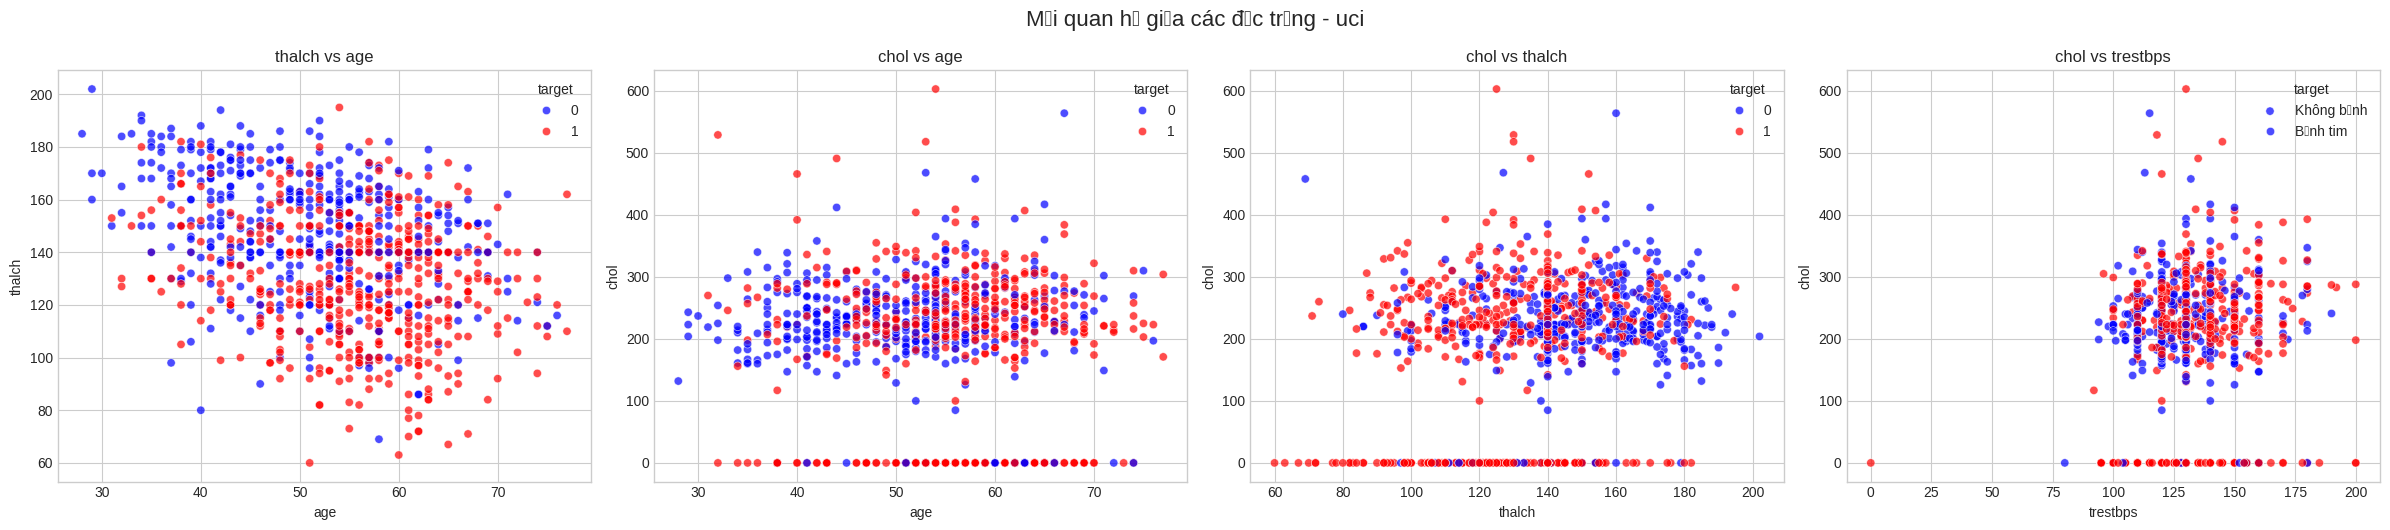

In [50]:
# Redefine preprocess_uci_data to ensure it's available
def preprocess_uci_data(df):
    """
    Tiền xử lý dữ liệu từ tập UCI
    """
    print("Đang xử lý dữ liệu UCI...")

    # Tạo bản sao để không ảnh hưởng đến dữ liệu gốc
    data = df.copy()

    # Xử lý giá trị thiếu
    if data.isnull().sum().sum() > 0:
        print("Đang xử lý giá trị thiếu...")
        # Xử lý các cột số
        numeric_features = data.select_dtypes(include=['int64', 'float64']).columns
        numeric_imputer = SimpleImputer(strategy='median')
        data[numeric_features] = numeric_imputer.fit_transform(data[numeric_features])

        # Xử lý các cột phân loại
        categorical_features = data.select_dtypes(include=['object']).columns
        if len(categorical_features) > 0:
            categorical_imputer = SimpleImputer(strategy='most_frequent')
            data[categorical_features] = categorical_imputer.fit_transform(data[categorical_features])
            print(f"Đã xử lý giá trị thiếu trong {len(categorical_features)} cột phân loại")
    else:
        print("Không có giá trị thiếu trong dữ liệu UCI")

    # Xử lý cột target (nếu có cột 'num')
    if 'num' in data.columns:
        # Chuyển thành dạng nhị phân: 0 = không bệnh (0), 1 = có bệnh (1-4)
        data['target'] = data['num'].apply(lambda x: 0 if x == 0 else 1)
        data = data.drop('num', axis=1)
        print("Đã tạo cột 'target' từ cột 'num' và chuyển về dạng nhị phân (0/1)")

    # Loại bỏ các cột không cần thiết
    if 'id' in data.columns:
        data = data.drop('id', axis=1)
        print("Đã loại bỏ cột 'id'")

    # Mã hóa các biến phân loại
    categorical_features = data.select_dtypes(include=['object']).columns
    if len(categorical_features) > 0:
        print(f"Đang mã hóa {len(categorical_features)} biến phân loại...")
        # One-hot encoding cho các biến phân loại
        encoded_data = pd.get_dummies(data[categorical_features], drop_first=True)

        # Loại bỏ các cột phân loại gốc và thêm các cột đã mã hóa
        data = data.drop(categorical_features, axis=1)
        data = pd.concat([data, encoded_data], axis=1)

    # Hiển thị thông tin về đặc trưng và nhãn
    if 'target' in data.columns:
        features = data.drop('target', axis=1)
        target = data['target']
        print(f"\nSố lượng mẫu: {data.shape[0]}")
        print(f"Số lượng đặc trưng: {features.shape[1]}")
        print(f"Phân bố nhãn: {target.value_counts().to_dict()}")
    else:
        print("\nKhông tìm thấy cột 'target' trong dữ liệu UCI sau khi tiền xử lý")

    return data

# Redefine plot_scatter_relationships to ensure it's available
def plot_scatter_relationships(df, dataset_name):
    """
    Vẽ scatter plots giữa các cặp đặc trưng quan trọng
    """
    # Lựa chọn một số đặc trưng quan trọng
    key_features = []

    # Xác định đặc trưng đích
    target_col = 'target' if 'target' in df.columns else 'condition'

    # Xác định các đặc trưng số quan trọng dựa trên tập dữ liệu
    if 'age' in df.columns and 'thalch' in df.columns:
        key_features.append(('age', 'thalch'))

    if 'age' in df.columns and 'chol' in df.columns:
        key_features.append(('age', 'chol'))

    if 'thalch' in df.columns and 'chol' in df.columns:
        key_features.append(('thalch', 'chol'))

    if 'trestbps' in df.columns and 'chol' in df.columns:
        key_features.append(('trestbps', 'chol'))

    if len(key_features) == 0:
        print(f"Không tìm thấy các cặp đặc trưng phù hợp trong tập dữ liệu {dataset_name}")
        return

    # Vẽ scatter plots
    fig, axes = plt.subplots(1, len(key_features), figsize=(6*len(key_features), 5))
    if len(key_features) == 1:
        axes = [axes]

    for i, (x_feature, y_feature) in enumerate(key_features):
        # Check if the feature exists in the dataframe before plotting
        if x_feature in df.columns and y_feature in df.columns and target_col in df.columns:
             sns.scatterplot(
                data=df,
                x=x_feature,
                y=y_feature,
                hue=target_col,
                palette=['blue', 'red'],
                alpha=0.7,
                ax=axes[i]
            )
             axes[i].set_title(f'{y_feature} vs {x_feature}')
             axes[i].set_xlabel(x_feature)
             axes[i].set_ylabel(y_feature)
             if i == len(key_features) - 1:  # Chỉ hiển thị legend cho biểu đồ cuối cùng
                axes[i].legend(['Không bệnh', 'Bệnh tim'], title=target_col)
        else:
            print(f"Skipping plot for {x_feature} vs {y_feature} as one or more columns are missing.")
            axes[i].set_visible(False) # Hide the empty subplot

    plt.tight_layout()
    plt.suptitle(f'Mối quan hệ giữa các đặc trưng - {dataset_name}', fontsize=16, y=1.05)
    plt.savefig(f'visualizations/{dataset_name}_scatter_plots.png')
    plt.show()


print("Biểu đồ Scatter cho tập dữ liệu UCI:")

# Ensure uci_processed is defined by running the preprocessing step
uci_processed = preprocess_uci_data(uci_df)

# Use the processed UCI dataframe which contains the 'target' column
plot_scatter_relationships(uci_processed, 'uci')

Ma trận tương quan cho tập dữ liệu Heart:


/tmp/ipython-input-51-4171757768.py:20: UserWarning: Glyph 7853 (\N{LATIN SMALL LETTER A WITH CIRCUMFLEX AND DOT BELOW}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-51-4171757768.py:20: UserWarning: Glyph 432 (\N{LATIN SMALL LETTER U WITH HORN}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-51-4171757768.py:20: UserWarning: Glyph 417 (\N{LATIN SMALL LETTER O WITH HORN}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-51-4171757768.py:21: UserWarning: Glyph 7853 (\N{LATIN SMALL LETTER A WITH CIRCUMFLEX AND DOT BELOW}) missing from font(s) Liberation Sans.
  plt.savefig(f'visualizations/{dataset_name}_correlation.png')
/tmp/ipython-input-51-4171757768.py:21: UserWarning: Glyph 432 (\N{LATIN SMALL LETTER U WITH HORN}) missing from font(s) Liberation Sans.
  plt.savefig(f'visualizations/{dataset_name}_correlation.png')
/tmp/ipython-input-51-4171757768.py:21: UserWarning: Glyph 417 (\N{LATIN SMAL

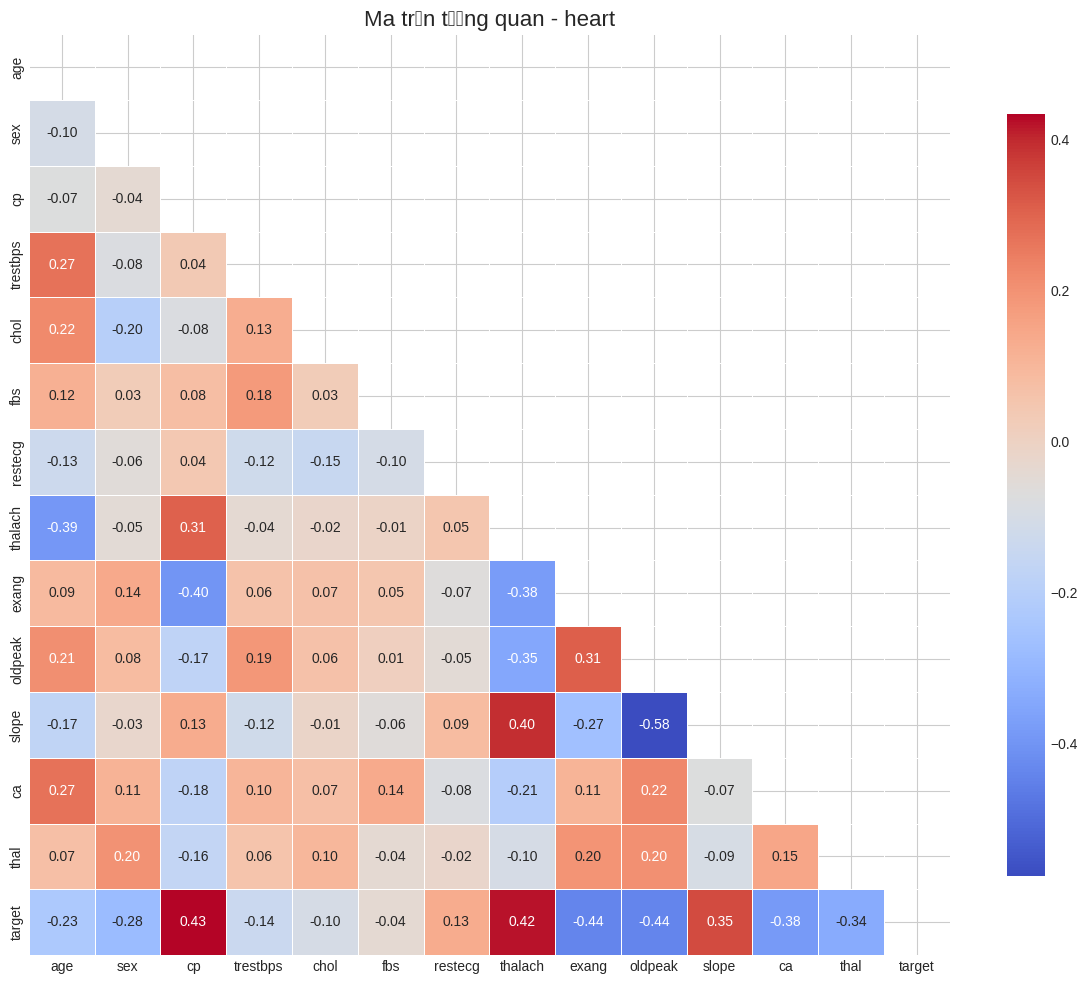


Các cặp đặc trưng có tương quan cao (|r| > 0.5) trong tập dữ liệu heart:
- oldpeak và slope: -0.575


In [51]:
### 2.3 Phân tích tương quan bằng Heatmap

def plot_correlation_matrix(df, dataset_name):
    """
    Vẽ ma trận tương quan giữa các đặc trưng
    """
    # Lấy các cột số để tính tương quan
    numeric_df = df.select_dtypes(include=['int64', 'float64'])

    # Tính ma trận tương quan
    corr = numeric_df.corr()

    # Vẽ heatmap
    plt.figure(figsize=(12, 10))
    mask = np.triu(np.ones_like(corr, dtype=bool))  # Để chỉ hiển thị nửa dưới của ma trận
    sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', cmap='coolwarm',
                square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})

    plt.title(f'Ma trận tương quan - {dataset_name}', fontsize=16)
    plt.tight_layout()
    plt.savefig(f'visualizations/{dataset_name}_correlation.png')
    plt.show()

    # Tìm các cặp đặc trưng có tương quan cao
    high_corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
    high_corr_pairs = [(corr.index[i], corr.columns[j], corr.iloc[i, j])
                      for i, j in zip(*np.where(np.abs(high_corr) > 0.5))]

    if high_corr_pairs:
        print(f"\nCác cặp đặc trưng có tương quan cao (|r| > 0.5) trong tập dữ liệu {dataset_name}:")
        for feat1, feat2, corr_val in sorted(high_corr_pairs, key=lambda x: abs(x[2]), reverse=True):
            print(f"- {feat1} và {feat2}: {corr_val:.3f}")
    else:
        print(f"\nKhông có cặp đặc trưng nào có tương quan cao (|r| > 0.5) trong tập dữ liệu {dataset_name}")

# Vẽ ma trận tương quan cho từng tập dữ liệu
print("Ma trận tương quan cho tập dữ liệu Heart:")
plot_correlation_matrix(heart_df, 'heart')



Ma trận tương quan cho tập dữ liệu Cleveland:


/tmp/ipython-input-51-4171757768.py:20: UserWarning: Glyph 7853 (\N{LATIN SMALL LETTER A WITH CIRCUMFLEX AND DOT BELOW}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-51-4171757768.py:20: UserWarning: Glyph 432 (\N{LATIN SMALL LETTER U WITH HORN}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-51-4171757768.py:20: UserWarning: Glyph 417 (\N{LATIN SMALL LETTER O WITH HORN}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-51-4171757768.py:21: UserWarning: Glyph 7853 (\N{LATIN SMALL LETTER A WITH CIRCUMFLEX AND DOT BELOW}) missing from font(s) Liberation Sans.
  plt.savefig(f'visualizations/{dataset_name}_correlation.png')
/tmp/ipython-input-51-4171757768.py:21: UserWarning: Glyph 432 (\N{LATIN SMALL LETTER U WITH HORN}) missing from font(s) Liberation Sans.
  plt.savefig(f'visualizations/{dataset_name}_correlation.png')
/tmp/ipython-input-51-4171757768.py:21: UserWarning: Glyph 417 (\N{LATIN SMAL

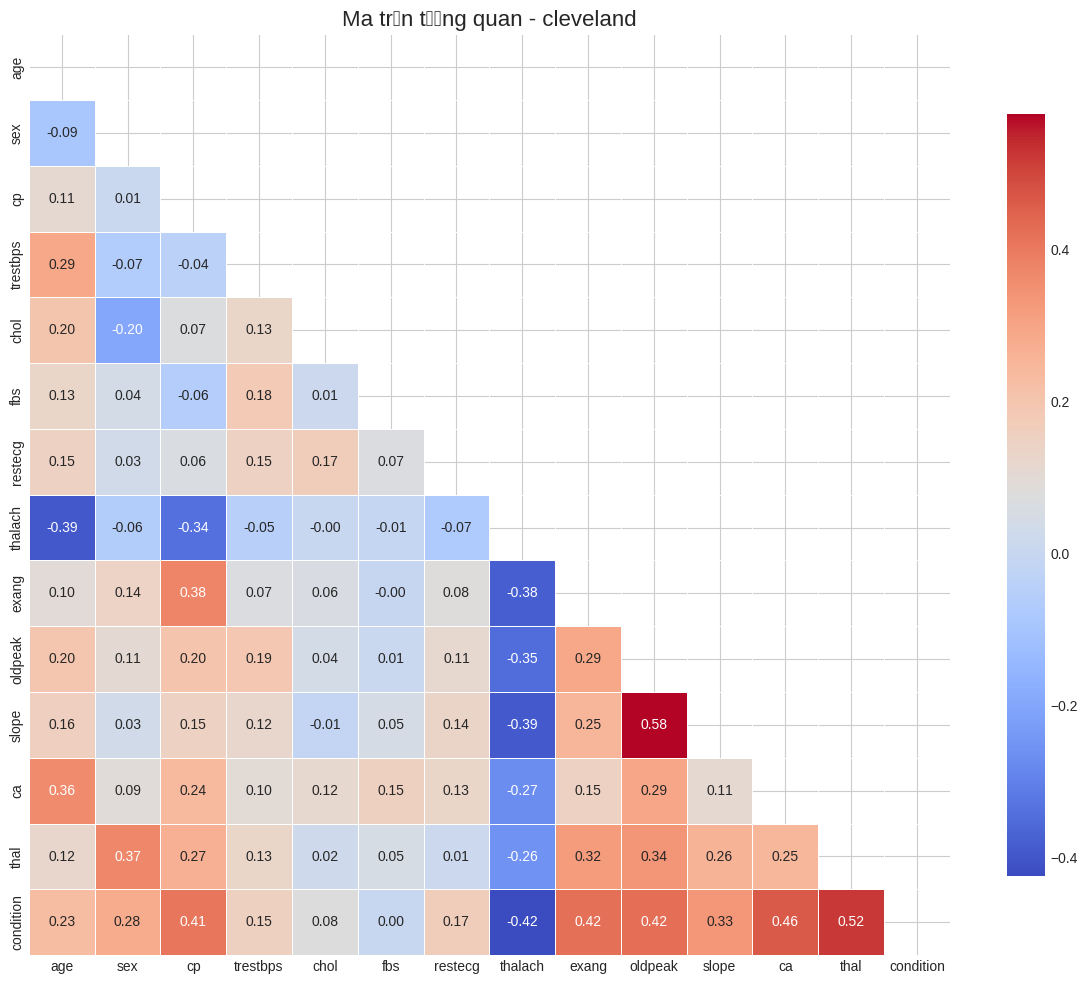


Các cặp đặc trưng có tương quan cao (|r| > 0.5) trong tập dữ liệu cleveland:
- oldpeak và slope: 0.579
- thal và condition: 0.521


In [52]:
print("\nMa trận tương quan cho tập dữ liệu Cleveland:")
plot_correlation_matrix(cleveland_df, 'cleveland')



Ma trận tương quan cho tập dữ liệu UCI:


/tmp/ipython-input-51-4171757768.py:20: UserWarning: Glyph 7853 (\N{LATIN SMALL LETTER A WITH CIRCUMFLEX AND DOT BELOW}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-51-4171757768.py:20: UserWarning: Glyph 432 (\N{LATIN SMALL LETTER U WITH HORN}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-51-4171757768.py:20: UserWarning: Glyph 417 (\N{LATIN SMALL LETTER O WITH HORN}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-51-4171757768.py:21: UserWarning: Glyph 7853 (\N{LATIN SMALL LETTER A WITH CIRCUMFLEX AND DOT BELOW}) missing from font(s) Liberation Sans.
  plt.savefig(f'visualizations/{dataset_name}_correlation.png')
/tmp/ipython-input-51-4171757768.py:21: UserWarning: Glyph 432 (\N{LATIN SMALL LETTER U WITH HORN}) missing from font(s) Liberation Sans.
  plt.savefig(f'visualizations/{dataset_name}_correlation.png')
/tmp/ipython-input-51-4171757768.py:21: UserWarning: Glyph 417 (\N{LATIN SMAL

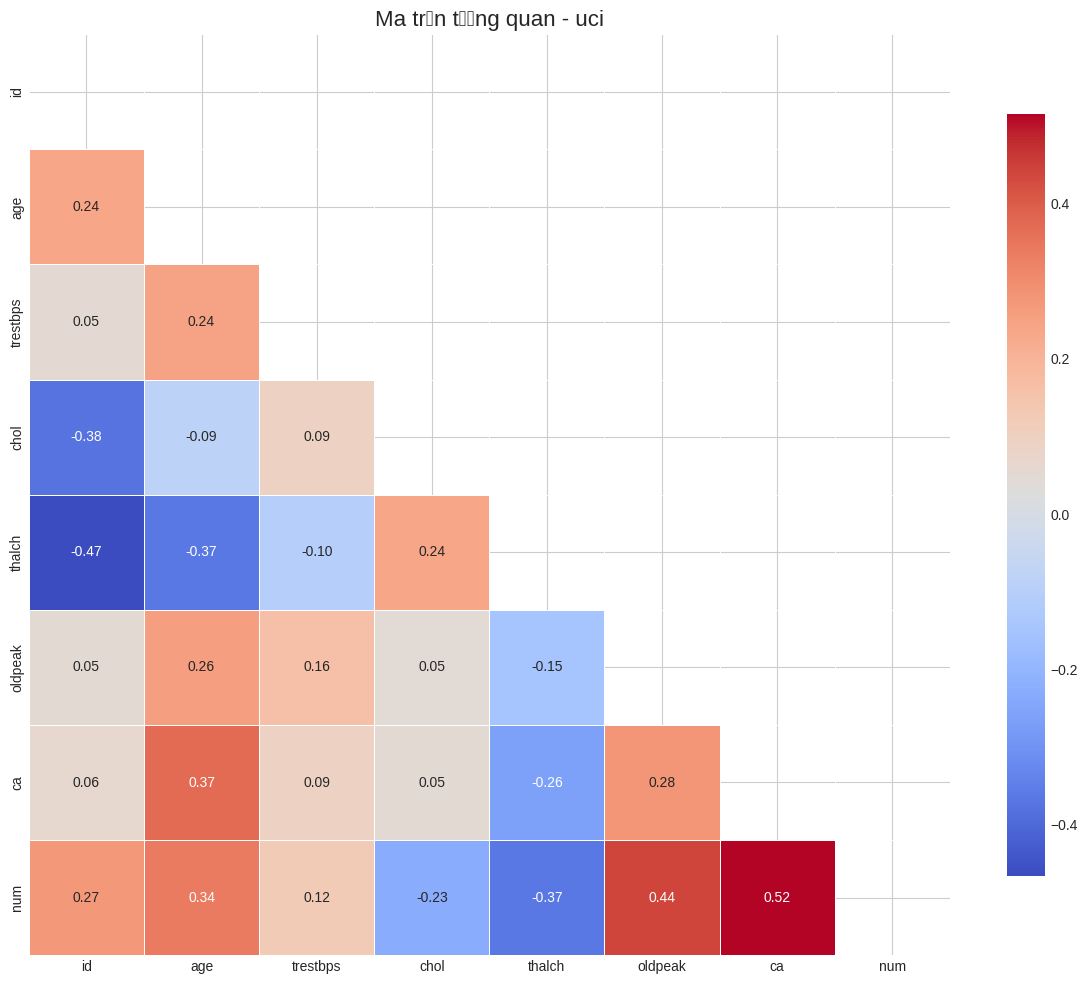


Các cặp đặc trưng có tương quan cao (|r| > 0.5) trong tập dữ liệu uci:
- ca và num: 0.516


In [53]:
print("\nMa trận tương quan cho tập dữ liệu UCI:")
plot_correlation_matrix(uci_df, 'uci')


/tmp/ipython-input-54-4126590973.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_disease_rate = df.groupby('age_group')[target_col].mean().reset_index()


Biểu đồ Line Chart cho tập dữ liệu Heart:


/tmp/ipython-input-54-4126590973.py:34: UserWarning: Glyph 7893 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX AND HOOK ABOVE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-54-4126590973.py:34: UserWarning: Glyph 7881 (\N{LATIN SMALL LETTER I WITH HOOK ABOVE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-54-4126590973.py:34: UserWarning: Glyph 7879 (\N{LATIN SMALL LETTER E WITH CIRCUMFLEX AND DOT BELOW}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-54-4126590973.py:34: UserWarning: Glyph 7855 (\N{LATIN SMALL LETTER A WITH BREVE AND ACUTE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-54-4126590973.py:34: UserWarning: Glyph 7897 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX AND DOT BELOW}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-54-4126590973.py:35: UserWarning: Glyph 7893 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX AND HOOK ABOVE}) 

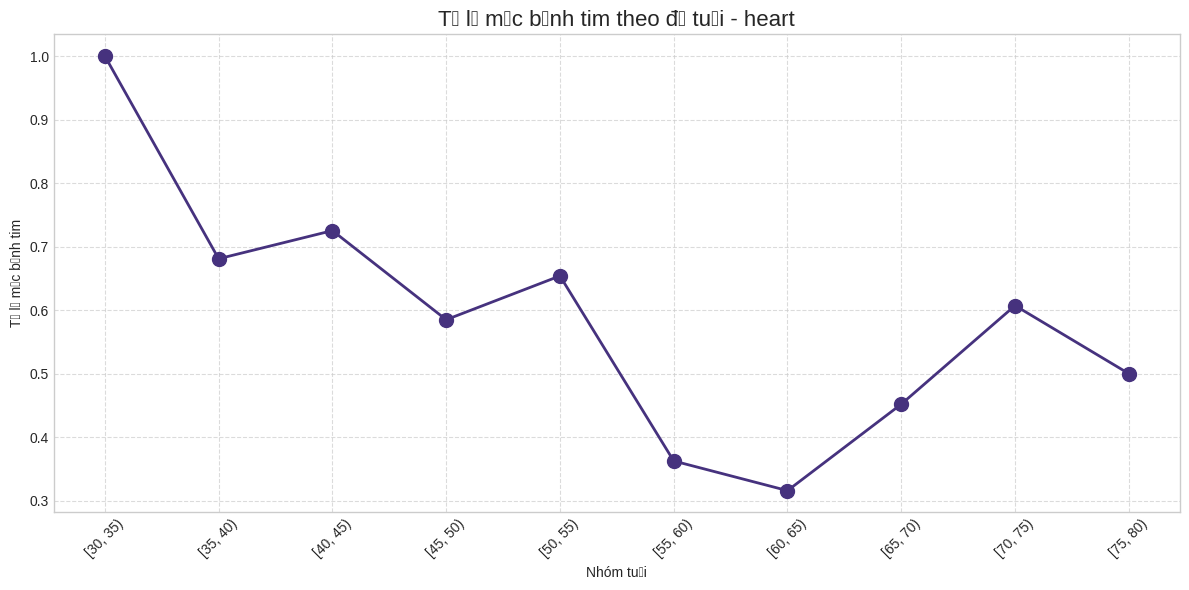

/tmp/ipython-input-54-4126590973.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  chol_disease_rate = df.groupby('chol_group')[target_col].mean().reset_index()
/tmp/ipython-input-54-4126590973.py:60: UserWarning: Glyph 7881 (\N{LATIN SMALL LETTER I WITH HOOK ABOVE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-54-4126590973.py:60: UserWarning: Glyph 7879 (\N{LATIN SMALL LETTER E WITH CIRCUMFLEX AND DOT BELOW}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-54-4126590973.py:60: UserWarning: Glyph 7855 (\N{LATIN SMALL LETTER A WITH BREVE AND ACUTE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-54-4126590973.py:60: UserWarning: Glyph 7913 (\N{LATIN SMALL LETTER U WITH HORN AND ACUTE}) missing from fon

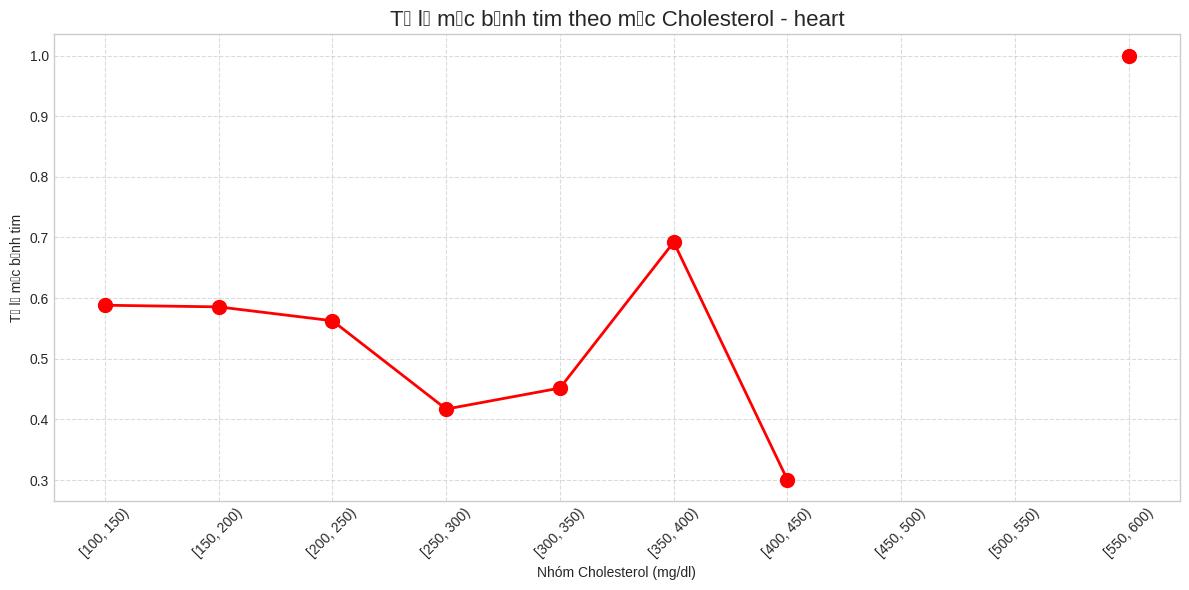

In [54]:
### 2.4 Phân tích xu hướng bằng Line Chart

def plot_line_charts(df, dataset_name):
    """
    Vẽ biểu đồ đường phân tích xu hướng theo tuổi
    """
    # Xác định biến đích
    target_col = 'target' if 'target' in df.columns else 'condition'

    # Kiểm tra xem có cột tuổi không
    if 'age' not in df.columns:
        print(f"Không tìm thấy cột tuổi trong tập dữ liệu {dataset_name}")
        return

    # Tạo các nhóm tuổi
    df['age_group'] = pd.cut(df['age'], bins=range(30, 85, 5), right=False)

    # Tính tỉ lệ mắc bệnh theo từng nhóm tuổi
    age_disease_rate = df.groupby('age_group')[target_col].mean().reset_index()

    # Vẽ biểu đồ đường
    plt.figure(figsize=(12, 6))
    plt.plot(age_disease_rate['age_group'].astype(str),
             age_disease_rate[target_col],
             marker='o',
             linewidth=2,
             markersize=10)

    plt.title(f'Tỉ lệ mắc bệnh tim theo độ tuổi - {dataset_name}', fontsize=16)
    plt.xlabel('Nhóm tuổi')
    plt.ylabel('Tỉ lệ mắc bệnh tim')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f'visualizations/{dataset_name}_age_disease_trend.png')
    plt.show()

    # Nếu có dữ liệu về cholesterol, vẽ xu hướng theo cholesterol
    if 'chol' in df.columns:
        # Tạo các nhóm cholesterol
        df['chol_group'] = pd.cut(df['chol'], bins=range(100, 601, 50), right=False)

        # Tính tỉ lệ mắc bệnh theo từng nhóm cholesterol
        chol_disease_rate = df.groupby('chol_group')[target_col].mean().reset_index()

        # Vẽ biểu đồ đường
        plt.figure(figsize=(12, 6))
        plt.plot(chol_disease_rate['chol_group'].astype(str),
                chol_disease_rate[target_col],
                marker='o',
                linewidth=2,
                color='red',
                markersize=10)

        plt.title(f'Tỉ lệ mắc bệnh tim theo mức Cholesterol - {dataset_name}', fontsize=16)
        plt.xlabel('Nhóm Cholesterol (mg/dl)')
        plt.ylabel('Tỉ lệ mắc bệnh tim')
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.savefig(f'visualizations/{dataset_name}_chol_disease_trend.png')
        plt.show()

# Vẽ line charts cho từng tập dữ liệu
print("Biểu đồ Line Chart cho tập dữ liệu Heart:")
plot_line_charts(heart_df, 'heart')



Biểu đồ Line Chart cho tập dữ liệu Cleveland:


/tmp/ipython-input-54-4126590973.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_disease_rate = df.groupby('age_group')[target_col].mean().reset_index()
/tmp/ipython-input-54-4126590973.py:34: UserWarning: Glyph 7893 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX AND HOOK ABOVE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-54-4126590973.py:34: UserWarning: Glyph 7881 (\N{LATIN SMALL LETTER I WITH HOOK ABOVE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-54-4126590973.py:34: UserWarning: Glyph 7879 (\N{LATIN SMALL LETTER E WITH CIRCUMFLEX AND DOT BELOW}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-54-4126590973.py:34: UserWarning: Glyph 7855 (\N{LATIN SMALL LETTER A WITH BREVE AND ACUTE}) missing

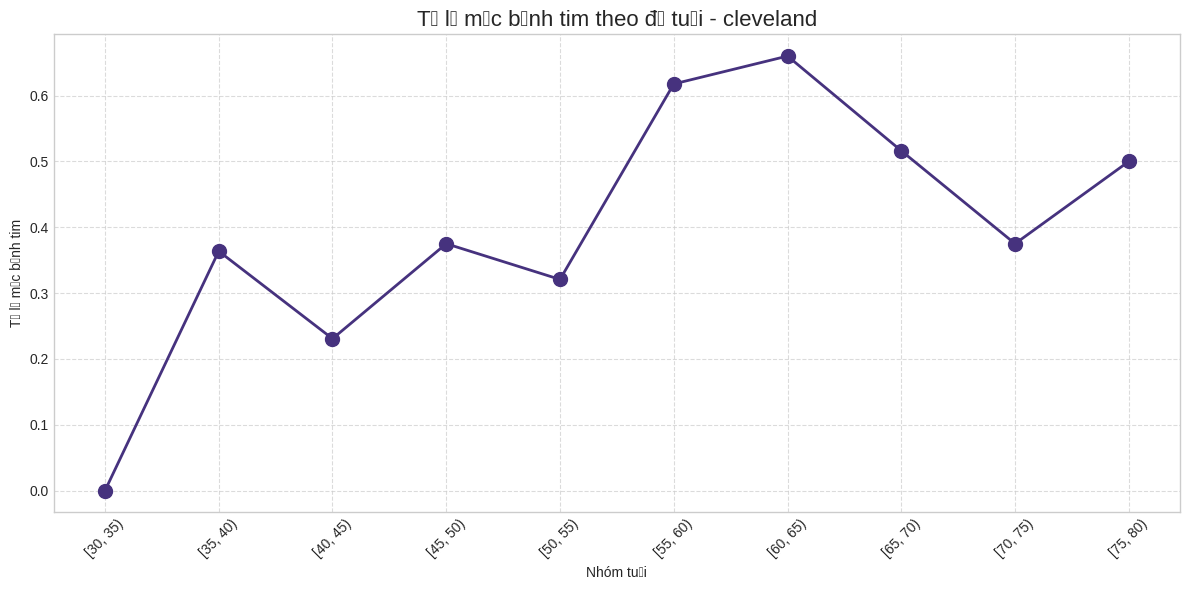

/tmp/ipython-input-54-4126590973.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  chol_disease_rate = df.groupby('chol_group')[target_col].mean().reset_index()
/tmp/ipython-input-54-4126590973.py:60: UserWarning: Glyph 7881 (\N{LATIN SMALL LETTER I WITH HOOK ABOVE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-54-4126590973.py:60: UserWarning: Glyph 7879 (\N{LATIN SMALL LETTER E WITH CIRCUMFLEX AND DOT BELOW}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-54-4126590973.py:60: UserWarning: Glyph 7855 (\N{LATIN SMALL LETTER A WITH BREVE AND ACUTE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-54-4126590973.py:60: UserWarning: Glyph 7913 (\N{LATIN SMALL LETTER U WITH HORN AND ACUTE}) missing from fon

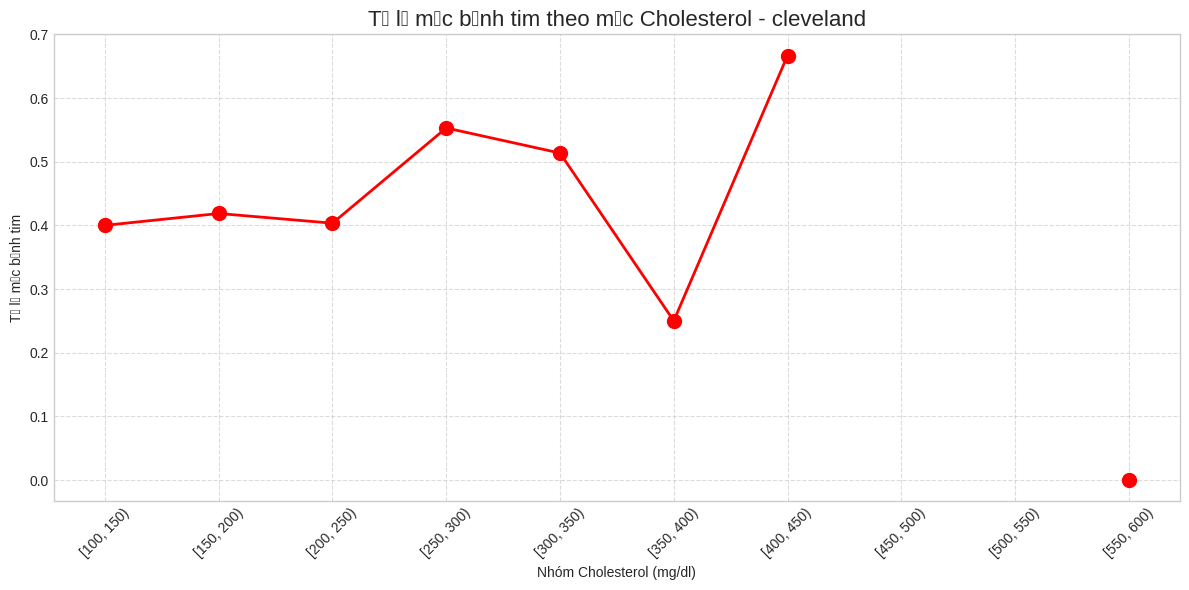

In [55]:
print("\nBiểu đồ Line Chart cho tập dữ liệu Cleveland:")
plot_line_charts(cleveland_df, 'cleveland')



Biểu đồ Line Chart cho tập dữ liệu UCI:
Đang xử lý dữ liệu UCI...
Đang xử lý giá trị thiếu...
Đã xử lý giá trị thiếu trong 8 cột phân loại
Đã tạo cột 'target' từ cột 'num' và chuyển về dạng nhị phân (0/1)
Đã loại bỏ cột 'id'
Đang mã hóa 8 biến phân loại...

Số lượng mẫu: 920
Số lượng đặc trưng: 21
Phân bố nhãn: {1: 509, 0: 411}


/tmp/ipython-input-56-276483782.py:95: UserWarning: Glyph 7893 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX AND HOOK ABOVE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-56-276483782.py:95: UserWarning: Glyph 7881 (\N{LATIN SMALL LETTER I WITH HOOK ABOVE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-56-276483782.py:95: UserWarning: Glyph 7879 (\N{LATIN SMALL LETTER E WITH CIRCUMFLEX AND DOT BELOW}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-56-276483782.py:95: UserWarning: Glyph 7855 (\N{LATIN SMALL LETTER A WITH BREVE AND ACUTE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-56-276483782.py:95: UserWarning: Glyph 7897 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX AND DOT BELOW}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-56-276483782.py:96: UserWarning: Glyph 7893 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX AND HOOK ABOVE}) missin

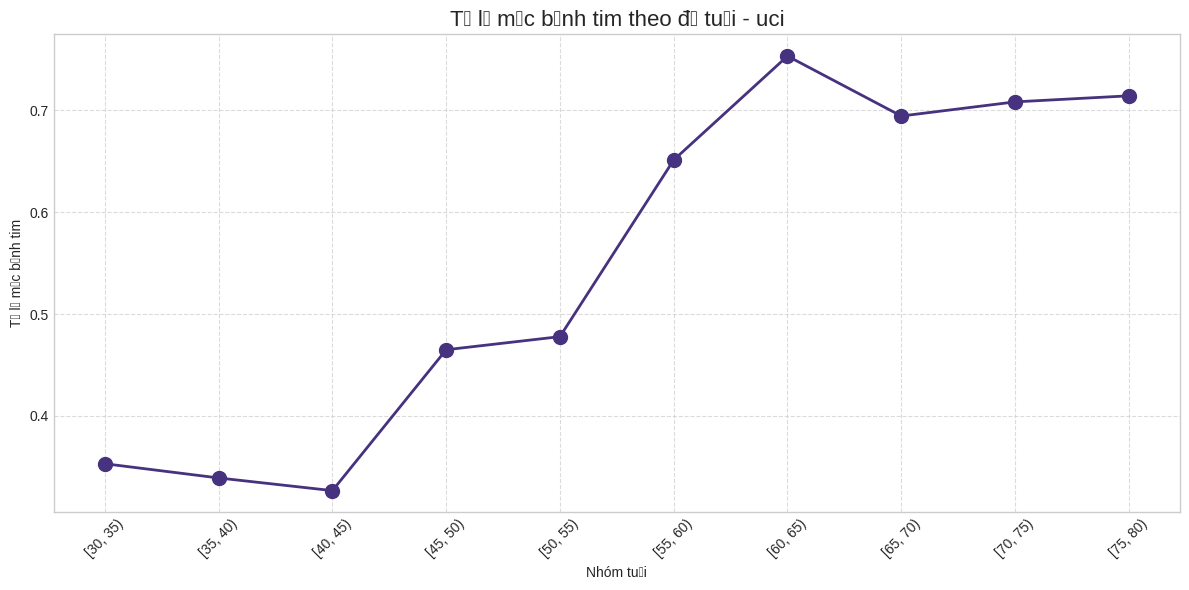

/tmp/ipython-input-56-276483782.py:121: UserWarning: Glyph 7881 (\N{LATIN SMALL LETTER I WITH HOOK ABOVE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-56-276483782.py:121: UserWarning: Glyph 7879 (\N{LATIN SMALL LETTER E WITH CIRCUMFLEX AND DOT BELOW}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-56-276483782.py:121: UserWarning: Glyph 7855 (\N{LATIN SMALL LETTER A WITH BREVE AND ACUTE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-56-276483782.py:121: UserWarning: Glyph 7913 (\N{LATIN SMALL LETTER U WITH HORN AND ACUTE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-56-276483782.py:122: UserWarning: Glyph 7881 (\N{LATIN SMALL LETTER I WITH HOOK ABOVE}) missing from font(s) Liberation Sans.
  plt.savefig(f'visualizations/{dataset_name}_chol_disease_trend.png')
/tmp/ipython-input-56-276483782.py:122: UserWarning: Glyph 7879 (\N{LATIN SMALL LETTER E WITH CIR

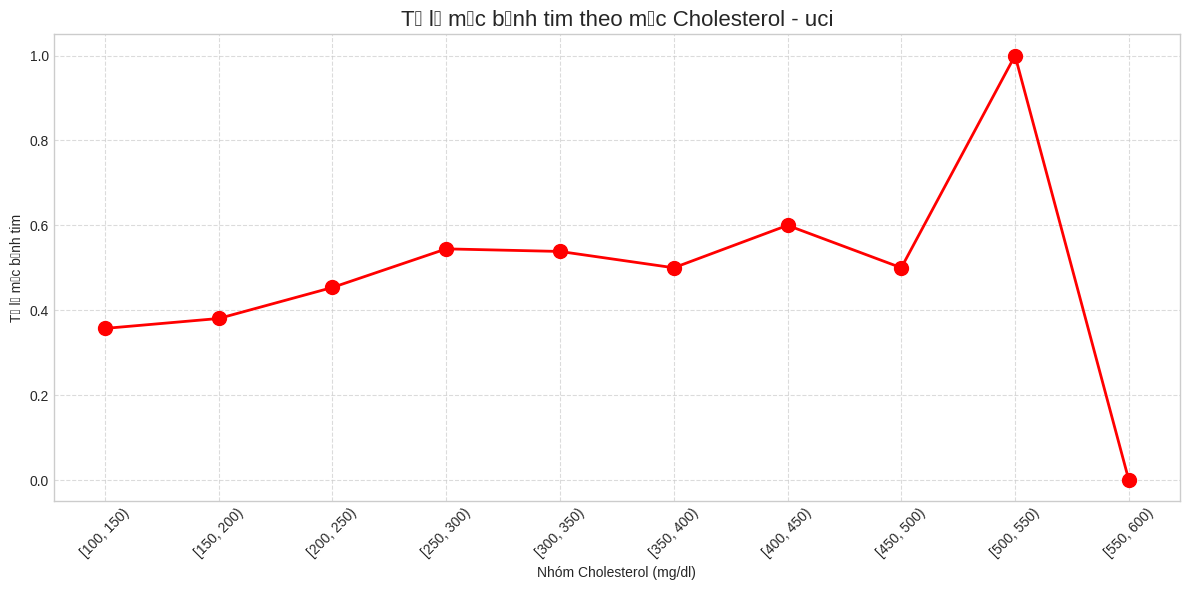

In [56]:
# Redefine preprocess_uci_data to ensure it's available
def preprocess_uci_data(df):
    """
    Tiền xử lý dữ liệu từ tập UCI
    """
    print("Đang xử lý dữ liệu UCI...")

    # Tạo bản sao để không ảnh hưởng đến dữ liệu gốc
    data = df.copy()

    # Xử lý giá trị thiếu
    if data.isnull().sum().sum() > 0:
        print("Đang xử lý giá trị thiếu...")
        # Xử lý các cột số
        numeric_features = data.select_dtypes(include=['int64', 'float64']).columns
        numeric_imputer = SimpleImputer(strategy='median')
        data[numeric_features] = numeric_imputer.fit_transform(data[numeric_features])

        # Xử lý các cột phân loại
        categorical_features = data.select_dtypes(include=['object']).columns
        if len(categorical_features) > 0:
            categorical_imputer = SimpleImputer(strategy='most_frequent')
            data[categorical_features] = categorical_imputer.fit_transform(data[categorical_features])
            print(f"Đã xử lý giá trị thiếu trong {len(categorical_features)} cột phân loại")
    else:
        print("Không có giá trị thiếu trong dữ liệu UCI")

    # Xử lý cột target (nếu có cột 'num')
    if 'num' in data.columns:
        # Chuyển thành dạng nhị phân: 0 = không bệnh (0), 1 = có bệnh (1-4)
        data['target'] = data['num'].apply(lambda x: 0 if x == 0 else 1)
        data = data.drop('num', axis=1)
        print("Đã tạo cột 'target' từ cột 'num' và chuyển về dạng nhị phân (0/1)")

    # Loại bỏ các cột không cần thiết
    if 'id' in data.columns:
        data = data.drop('id', axis=1)
        print("Đã loại bỏ cột 'id'")

    # Mã hóa các biến phân loại
    categorical_features = data.select_dtypes(include=['object']).columns
    if len(categorical_features) > 0:
        print(f"Đang mã hóa {len(categorical_features)} biến phân loại...")
        # One-hot encoding cho các biến phân loại
        encoded_data = pd.get_dummies(data[categorical_features], drop_first=True)

        # Loại bỏ các cột phân loại gốc và thêm các cột đã mã hóa
        data = data.drop(categorical_features, axis=1)
        data = pd.concat([data, encoded_data], axis=1)

    # Hiển thị thông tin về đặc trưng và nhãn
    if 'target' in data.columns:
        features = data.drop('target', axis=1)
        target = data['target']
        print(f"\nSố lượng mẫu: {data.shape[0]}")
        print(f"Số lượng đặc trưng: {features.shape[1]}")
        print(f"Phân bố nhãn: {target.value_counts().to_dict()}")
    else:
        print("\nKhông tìm thấy cột 'target' trong dữ liệu UCI sau khi tiền xử lý")

    return data

# Redefine plot_line_charts to ensure it's available and handles potential column variations
def plot_line_charts(df, dataset_name):
    """
    Vẽ biểu đồ đường phân tích xu hướng theo tuổi
    """
    # Xác định biến đích
    target_col = 'target' if 'target' in df.columns else 'condition'

    # Kiểm tra xem có cột tuổi không
    if 'age' not in df.columns:
        print(f"Không tìm thấy cột tuổi trong tập dữ liệu {dataset_name}")
        return

    # Tạo các nhóm tuổi
    df['age_group'] = pd.cut(df['age'], bins=range(30, 85, 5), right=False)

    # Tính tỉ lệ mắc bệnh theo từng nhóm tuổi
    age_disease_rate = df.groupby('age_group', observed=False)[target_col].mean().reset_index()

    # Vẽ biểu đồ đường
    plt.figure(figsize=(12, 6))
    plt.plot(age_disease_rate['age_group'].astype(str),
             age_disease_rate[target_col],
             marker='o',
             linewidth=2,
             markersize=10)

    plt.title(f'Tỉ lệ mắc bệnh tim theo độ tuổi - {dataset_name}', fontsize=16)
    plt.xlabel('Nhóm tuổi')
    plt.ylabel('Tỉ lệ mắc bệnh tim')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f'visualizations/{dataset_name}_age_disease_trend.png')
    plt.show()

    # Nếu có dữ liệu về cholesterol, vẽ xu hướng theo cholesterol
    if 'chol' in df.columns:
        # Tạo các nhóm cholesterol
        df['chol_group'] = pd.cut(df['chol'], bins=range(100, 601, 50), right=False)

        # Tính tỉ lệ mắc bệnh theo từng nhóm cholesterol
        chol_disease_rate = df.groupby('chol_group', observed=False)[target_col].mean().reset_index()

        # Vẽ biểu đồ đường
        plt.figure(figsize=(12, 6))
        plt.plot(chol_disease_rate['chol_group'].astype(str),
                chol_disease_rate[target_col],
                marker='o',
                linewidth=2,
                color='red',
                markersize=10)

        plt.title(f'Tỉ lệ mắc bệnh tim theo mức Cholesterol - {dataset_name}', fontsize=16)
        plt.xlabel('Nhóm Cholesterol (mg/dl)')
        plt.ylabel('Tỉ lệ mắc bệnh tim')
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.savefig(f'visualizations/{dataset_name}_chol_disease_trend.png')
        plt.show()
    else:
        print(f"Cột 'chol' không có trong tập dữ liệu {dataset_name}, bỏ qua biểu đồ xu hướng cholesterol.")


print("\nBiểu đồ Line Chart cho tập dữ liệu UCI:")

# Ensure uci_processed is defined by running the preprocessing step
uci_processed = preprocess_uci_data(uci_df)

# Use the processed UCI dataframe which contains the 'target' column
plot_line_charts(uci_processed, 'uci')

In [57]:
### 3.1 Xử lý giá trị thiếu và chuẩn hóa dữ liệu Heart

def preprocess_heart_data(df):
    """
    Tiền xử lý dữ liệu từ tập Heart
    """
    print("Đang xử lý dữ liệu Heart...")

    # Tạo bản sao để không ảnh hưởng đến dữ liệu gốc
    data = df.copy()

    # Kiểm tra và xử lý giá trị thiếu
    if data.isnull().sum().sum() > 0:
        print("Đang xử lý giá trị thiếu...")
        numeric_features = data.select_dtypes(include=['int64', 'float64']).columns
        numeric_imputer = SimpleImputer(strategy='median')
        data[numeric_features] = numeric_imputer.fit_transform(data[numeric_features])
    else:
        print("Không có giá trị thiếu trong dữ liệu Heart")

    # Chuẩn hóa các đặc trưng số
    print("Đang chuẩn hóa các đặc trưng số...")
    features = data.drop('target', axis=1)
    target = data['target']

    # Hiển thị thông tin về đặc trưng và nhãn
    print(f"\nSố lượng mẫu: {data.shape[0]}")
    print(f"Số lượng đặc trưng: {features.shape[1]}")
    print(f"Phân bố nhãn: {target.value_counts().to_dict()}")

    return data

# Xử lý dữ liệu Heart
heart_processed = preprocess_heart_data(heart_df)
print("\nDữ liệu Heart sau khi tiền xử lý:")
display(heart_processed.head())


Đang xử lý dữ liệu Heart...
Đang xử lý giá trị thiếu...
Đang chuẩn hóa các đặc trưng số...

Số lượng mẫu: 1025
Số lượng đặc trưng: 15
Phân bố nhãn: {1.0: 526, 0.0: 499}

Dữ liệu Heart sau khi tiền xử lý:


age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  52.0  1.0  0.0     125.0  212.0  0.0      1.0    168.0    0.0      1.0   
1  53.0  1.0  0.0     140.0  203.0  1.0      0.0    155.0    1.0      3.1   
2  70.0  1.0  0.0     145.0  174.0  0.0      1.0    125.0    1.0      2.6   
3  61.0  1.0  0.0     148.0  203.0  0.0      1.0    161.0    0.0      0.0   
4  62.0  0.0  0.0     138.0  294.0  1.0      1.0    106.0    0.0      1.9   

   slope   ca  thal  target age_group  chol_group  
0    2.0  2.0   3.0     0.0  [50, 55)  [200, 250)  
1    0.0  0.0   3.0     0.0  [50, 55)  [200, 250)  
2    0.0  0.0   3.0     0.0  [70, 75)  [150, 200)  
3    2.0  1.0   3.0     0.0  [60, 65)  [200, 250)  
4    1.0  3.0   2.0     0.0  [60, 65)  [250, 300)

In [58]:
### 3.2 Xử lý giá trị thiếu và chuẩn hóa dữ liệu Cleveland

def preprocess_cleveland_data(df):
    """
    Tiền xử lý dữ liệu từ tập Cleveland
    """
    print("Đang xử lý dữ liệu Cleveland...")

    # Tạo bản sao để không ảnh hưởng đến dữ liệu gốc
    data = df.copy()

    # Đổi tên cột condition thành target cho thống nhất (nếu có)
    if 'condition' in data.columns:
        data.rename(columns={'condition': 'target'}, inplace=True)
        print("Đã đổi tên cột 'condition' thành 'target' để thống nhất")

    # Chuyển đổi nhãn thành dạng nhị phân (0: không bệnh, 1: có bệnh)
    if 'target' in data.columns and data['target'].max() > 1:
        print("Chuyển đổi nhãn thành dạng nhị phân (0/1)...")
        data['target'] = data['target'].apply(lambda x: 0 if x == 0 else 1)

    # Kiểm tra và xử lý giá trị thiếu
    if data.isnull().sum().sum() > 0:
        print("Đang xử lý giá trị thiếu...")
        numeric_features = data.select_dtypes(include=['int64', 'float64']).columns
        numeric_imputer = SimpleImputer(strategy='median')
        data[numeric_features] = numeric_imputer.fit_transform(data[numeric_features])
    else:
        print("Không có giá trị thiếu trong dữ liệu Cleveland")

    # Hiển thị thông tin về đặc trưng và nhãn
    features = data.drop('target', axis=1)
    target = data['target']
    print(f"\nSố lượng mẫu: {data.shape[0]}")
    print(f"Số lượng đặc trưng: {features.shape[1]}")
    print(f"Phân bố nhãn: {target.value_counts().to_dict()}")

    return data

# Xử lý dữ liệu Cleveland
cleveland_processed = preprocess_cleveland_data(cleveland_df)
print("\nDữ liệu Cleveland sau khi tiền xử lý:")
display(cleveland_processed.head())


Đang xử lý dữ liệu Cleveland...
Đã đổi tên cột 'condition' thành 'target' để thống nhất
Đang xử lý giá trị thiếu...

Số lượng mẫu: 297
Số lượng đặc trưng: 15
Phân bố nhãn: {0.0: 160, 1.0: 137}

Dữ liệu Cleveland sau khi tiền xử lý:


age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  69.0  1.0  0.0     160.0  234.0  1.0      2.0    131.0    0.0      0.1   
1  69.0  0.0  0.0     140.0  239.0  0.0      0.0    151.0    0.0      1.8   
2  66.0  0.0  0.0     150.0  226.0  0.0      0.0    114.0    0.0      2.6   
3  65.0  1.0  0.0     138.0  282.0  1.0      2.0    174.0    0.0      1.4   
4  64.0  1.0  0.0     110.0  211.0  0.0      2.0    144.0    1.0      1.8   

   slope   ca  thal  target age_group  chol_group  
0    1.0  1.0   0.0     0.0  [65, 70)  [200, 250)  
1    0.0  2.0   0.0     0.0  [65, 70)  [200, 250)  
2    2.0  0.0   0.0     0.0  [65, 70)  [200, 250)  
3    1.0  1.0   0.0     1.0  [65, 70)  [250, 300)  
4    1.0  0.0   0.0     0.0  [60, 65)  [200, 250)

In [59]:
### 3.3 Xử lý giá trị thiếu và chuẩn hóa dữ liệu UCI

def preprocess_uci_data(df):
    """
    Tiền xử lý dữ liệu từ tập UCI
    """
    print("Đang xử lý dữ liệu UCI...")

    # Tạo bản sao để không ảnh hưởng đến dữ liệu gốc
    data = df.copy()

    # Xử lý giá trị thiếu
    if data.isnull().sum().sum() > 0:
        print("Đang xử lý giá trị thiếu...")
        # Xử lý các cột số
        numeric_features = data.select_dtypes(include=['int64', 'float64']).columns
        numeric_imputer = SimpleImputer(strategy='median')
        data[numeric_features] = numeric_imputer.fit_transform(data[numeric_features])

        # Xử lý các cột phân loại
        categorical_features = data.select_dtypes(include=['object']).columns
        if len(categorical_features) > 0:
            categorical_imputer = SimpleImputer(strategy='most_frequent')
            data[categorical_features] = categorical_imputer.fit_transform(data[categorical_features])
            print(f"Đã xử lý giá trị thiếu trong {len(categorical_features)} cột phân loại")
    else:
        print("Không có giá trị thiếu trong dữ liệu UCI")

    # Xử lý cột target (nếu có cột 'num')
    if 'num' in data.columns:
        # Chuyển thành dạng nhị phân: 0 = không bệnh (0), 1 = có bệnh (1-4)
        data['target'] = data['num'].apply(lambda x: 0 if x == 0 else 1)
        data = data.drop('num', axis=1)
        print("Đã tạo cột 'target' từ cột 'num' và chuyển về dạng nhị phân (0/1)")

    # Loại bỏ các cột không cần thiết
    if 'id' in data.columns:
        data = data.drop('id', axis=1)
        print("Đã loại bỏ cột 'id'")

    # Mã hóa các biến phân loại
    categorical_features = data.select_dtypes(include=['object']).columns
    if len(categorical_features) > 0:
        print(f"Đang mã hóa {len(categorical_features)} biến phân loại...")
        # One-hot encoding cho các biến phân loại
        encoded_data = pd.get_dummies(data[categorical_features], drop_first=True)

        # Loại bỏ các cột phân loại gốc và thêm các cột đã mã hóa
        data = data.drop(categorical_features, axis=1)
        data = pd.concat([data, encoded_data], axis=1)

    # Hiển thị thông tin về đặc trưng và nhãn
    if 'target' in data.columns:
        features = data.drop('target', axis=1)
        target = data['target']
        print(f"\nSố lượng mẫu: {data.shape[0]}")
        print(f"Số lượng đặc trưng: {features.shape[1]}")
        print(f"Phân bố nhãn: {target.value_counts().to_dict()}")
    else:
        print("\nKhông tìm thấy cột 'target' trong dữ liệu UCI sau khi tiền xử lý")

    return data

# Xử lý dữ liệu UCI
uci_processed = preprocess_uci_data(uci_df)
print("\nDữ liệu UCI sau khi tiền xử lý:")
display(uci_processed.head())


Đang xử lý dữ liệu UCI...
Đang xử lý giá trị thiếu...
Đã xử lý giá trị thiếu trong 8 cột phân loại
Đã tạo cột 'target' từ cột 'num' và chuyển về dạng nhị phân (0/1)
Đã loại bỏ cột 'id'
Đang mã hóa 8 biến phân loại...

Số lượng mẫu: 920
Số lượng đặc trưng: 21
Phân bố nhãn: {1: 509, 0: 411}

Dữ liệu UCI sau khi tiền xử lý:


age  trestbps   chol  thalch  oldpeak   ca  target  sex_Male  \
0  63.0     145.0  233.0   150.0      2.3  0.0       0      True   
1  67.0     160.0  286.0   108.0      1.5  3.0       1      True   
2  67.0     120.0  229.0   129.0      2.6  2.0       1      True   
3  37.0     130.0  250.0   187.0      3.5  0.0       0      True   
4  41.0     130.0  204.0   172.0      1.4  0.0       0     False   

   dataset_Hungary  dataset_Switzerland  ...  cp_non-anginal  \
0            False                False  ...           False   
1            False                False  ...           False   
2            False                False  ...           False   
3            False                False  ...            True   
4            False                False  ...           False   

   cp_typical angina  fbs_True  restecg_normal  restecg_st-t abnormality  \
0               True      True           False                     False   
1              False     False           False                     False   
2              False     False           False                     False   
3              False     False            True                     False   
4              False     False           False                     False   

   exang_True  slope_flat  slope_upsloping  thal_normal  \
0       False       False            False        False   
1        True        True            False         True   
2        True        True            False        False   
3       False       False            False         True   
4       False       False             True         True   

   thal_reversable defect  
0                   False  
1                   False  
2                    True  
3                   False  
4                   False  

[5 rows x 22 columns]

In [60]:
# 3.4 Mã hóa One-Hot cho các biến phân loại
print("\n### 3.4 Mã hóa One-Hot cho các biến phân loại ###")

# Hàm mã hóa one-hot cho các đặc trưng phân loại
def encode_categorical_features(df, categorical_features):
    """
    Mã hóa các biến phân loại bằng one-hot encoding
    """
    print(f"Đang mã hóa các đặc trưng phân loại: {categorical_features}")

    # Tạo bản sao để không ảnh hưởng dữ liệu gốc
    data = df.copy()

    # Lọc các đặc trưng tồn tại trong dữ liệu
    features_to_encode = [col for col in categorical_features if col in data.columns]

    if not features_to_encode:
        print("Không tìm thấy đặc trưng phân loại cần mã hóa!")
        return data

    # Sử dụng OneHotEncoder để mã hóa các biến phân loại
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    encoded_data = encoder.fit_transform(data[features_to_encode])

    # Tạo tên các cột mới
    encoded_column_names = encoder.get_feature_names_out(features_to_encode)

    # Tạo DataFrame chứa các đặc trưng đã mã hóa
    encoded_df = pd.DataFrame(encoded_data, columns=encoded_column_names, index=data.index)

    # Loại bỏ các cột phân loại gốc và thêm các cột đã mã hóa
    data = data.drop(features_to_encode, axis=1)
    data = pd.concat([data, encoded_df], axis=1)

    print(f"Đã mã hóa {len(features_to_encode)} đặc trưng thành {encoded_df.shape[1]} đặc trưng one-hot")
    return data

# Danh sách các đặc trưng phân loại cần mã hóa
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Mã hóa dữ liệu Heart
print("\n=== Mã hóa dữ liệu Heart ===")
heart_encoded = encode_categorical_features(heart_processed, categorical_features)
print("\nDữ liệu Heart sau khi mã hóa:")
display(heart_encoded.head())
print(f"Kích thước dữ liệu: {heart_encoded.shape}")

# Mã hóa dữ liệu Cleveland
print("\n=== Mã hóa dữ liệu Cleveland ===")
cleveland_encoded = encode_categorical_features(cleveland_processed, categorical_features)
print("\nDữ liệu Cleveland sau khi mã hóa:")
display(cleveland_encoded.head())
print(f"Kích thước dữ liệu: {cleveland_encoded.shape}")

# Mã hóa dữ liệu UCI
print("\n=== Mã hóa dữ liệu UCI ===")
uci_encoded = encode_categorical_features(uci_processed, categorical_features)
print("\nDữ liệu UCI sau khi mã hóa:")
display(uci_encoded.head())
print(f"Kích thước dữ liệu: {uci_encoded.shape}")



### 3.4 Mã hóa One-Hot cho các biến phân loại ###

=== Mã hóa dữ liệu Heart ===
Đang mã hóa các đặc trưng phân loại: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
Đã mã hóa 8 đặc trưng thành 25 đặc trưng one-hot

Dữ liệu Heart sau khi mã hóa:


age  trestbps   chol  thalach  oldpeak  target age_group  chol_group  \
0  52.0     125.0  212.0    168.0      1.0     0.0  [50, 55)  [200, 250)   
1  53.0     140.0  203.0    155.0      3.1     0.0  [50, 55)  [200, 250)   
2  70.0     145.0  174.0    125.0      2.6     0.0  [70, 75)  [150, 200)   
3  61.0     148.0  203.0    161.0      0.0     0.0  [60, 65)  [200, 250)   
4  62.0     138.0  294.0    106.0      1.9     0.0  [60, 65)  [250, 300)   

   sex_0.0  sex_1.0  ...  slope_2.0  ca_0.0  ca_1.0  ca_2.0  ca_3.0  ca_4.0  \
0      0.0      1.0  ...        1.0     0.0     0.0     1.0     0.0     0.0   
1      0.0      1.0  ...        0.0     1.0     0.0     0.0     0.0     0.0   
2      0.0      1.0  ...        0.0     1.0     0.0     0.0     0.0     0.0   
3      0.0      1.0  ...        1.0     0.0     1.0     0.0     0.0     0.0   
4      1.0      0.0  ...        0.0     0.0     0.0     0.0     1.0     0.0   

   thal_0.0  thal_1.0  thal_2.0  thal_3.0  
0       0.0       0.0       0.0       1.0  
1       0.0       0.0       0.0       1.0  
2       0.0       0.0       0.0       1.0  
3       0.0       0.0       0.0       1.0  
4       0.0       0.0       1.0       0.0  

[5 rows x 33 columns]

Kích thước dữ liệu: (1025, 33)

=== Mã hóa dữ liệu Cleveland ===
Đang mã hóa các đặc trưng phân loại: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
Đã mã hóa 8 đặc trưng thành 23 đặc trưng one-hot

Dữ liệu Cleveland sau khi mã hóa:


age  trestbps   chol  thalach  oldpeak  target age_group  chol_group  \
0  69.0     160.0  234.0    131.0      0.1     0.0  [65, 70)  [200, 250)   
1  69.0     140.0  239.0    151.0      1.8     0.0  [65, 70)  [200, 250)   
2  66.0     150.0  226.0    114.0      2.6     0.0  [65, 70)  [200, 250)   
3  65.0     138.0  282.0    174.0      1.4     1.0  [65, 70)  [250, 300)   
4  64.0     110.0  211.0    144.0      1.8     0.0  [60, 65)  [200, 250)   

   sex_0.0  sex_1.0  ...  slope_0.0  slope_1.0  slope_2.0  ca_0.0  ca_1.0  \
0      0.0      1.0  ...        0.0        1.0        0.0     0.0     1.0   
1      1.0      0.0  ...        1.0        0.0        0.0     0.0     0.0   
2      1.0      0.0  ...        0.0        0.0        1.0     1.0     0.0   
3      0.0      1.0  ...        0.0        1.0        0.0     0.0     1.0   
4      0.0      1.0  ...        0.0        1.0        0.0     1.0     0.0   

   ca_2.0  ca_3.0  thal_0.0  thal_1.0  thal_2.0  
0     0.0     0.0       1.0       0.0       0.0  
1     1.0     0.0       1.0       0.0       0.0  
2     0.0     0.0       1.0       0.0       0.0  
3     0.0     0.0       1.0       0.0       0.0  
4     0.0     0.0       1.0       0.0       0.0  

[5 rows x 31 columns]

Kích thước dữ liệu: (297, 31)

=== Mã hóa dữ liệu UCI ===
Đang mã hóa các đặc trưng phân loại: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
Đã mã hóa 1 đặc trưng thành 4 đặc trưng one-hot

Dữ liệu UCI sau khi mã hóa:


age  trestbps   chol  thalch  oldpeak  target  sex_Male  dataset_Hungary  \
0  63.0     145.0  233.0   150.0      2.3       0      True            False   
1  67.0     160.0  286.0   108.0      1.5       1      True            False   
2  67.0     120.0  229.0   129.0      2.6       1      True            False   
3  37.0     130.0  250.0   187.0      3.5       0      True            False   
4  41.0     130.0  204.0   172.0      1.4       0     False            False   

   dataset_Switzerland  dataset_VA Long Beach  ...  restecg_st-t abnormality  \
0                False                  False  ...                     False   
1                False                  False  ...                     False   
2                False                  False  ...                     False   
3                False                  False  ...                     False   
4                False                  False  ...                     False   

   exang_True  slope_flat  slope_upsloping  thal_normal  \
0       False       False            False        False   
1        True        True            False         True   
2        True        True            False        False   
3       False       False            False         True   
4       False       False             True         True   

   thal_reversable defect  ca_0.0  ca_1.0  ca_2.0  ca_3.0  
0                   False     1.0     0.0     0.0     0.0  
1                   False     0.0     0.0     0.0     1.0  
2                    True     0.0     0.0     1.0     0.0  
3                   False     1.0     0.0     0.0     0.0  
4                   False     1.0     0.0     0.0     0.0  

[5 rows x 25 columns]

Kích thước dữ liệu: (920, 25)


In [61]:
def split_and_scale_data(df, dataset_name):
    """
    Chia dữ liệu thành tập huấn luyện và tập kiểm tra, sau đó chuẩn hóa
    """
    print(f"Đang chia và chuẩn hóa dữ liệu {dataset_name}...")

    # Xác định biến đích
    if 'target' not in df.columns:
        print(f"Không tìm thấy cột 'target' trong dữ liệu {dataset_name}")
        return None, None, None, None, None

    # Tạo bản sao để không ảnh hưởng đến dữ liệu gốc
    df = df.copy()

    # Loại bỏ các cột chứa đối tượng Interval (như age_group, chol_group)
    interval_cols = [col for col in df.columns
                    if col != 'target' and (
                        df[col].dtype.name == 'category' or
                        'interval' in str(df[col].dtype).lower() or
                        df[col].dtype == 'object'
                    )]

    if interval_cols:
        print(f"Loại bỏ các cột không phải numeric: {interval_cols}")
        df = df.drop(columns=interval_cols)

    # Tách đặc trưng và nhãn
    X = df.drop('target', axis=1)
    y = df['target']

    # Chia thành tập huấn luyện và tập kiểm tra (80% - 20%)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Chuẩn hóa dữ liệu
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Hiển thị thông tin về kích thước dữ liệu
    print(f"Kích thước tập huấn luyện: {X_train.shape[0]} mẫu, {X_train.shape[1]} đặc trưng")
    print(f"Kích thước tập kiểm tra: {X_test.shape[0]} mẫu, {X_test.shape[1]} đặc trưng")
    print(f"Phân bố nhãn tập huấn luyện: {y_train.value_counts().to_dict()}")
    print(f"Phân bố nhãn tập kiểm tra: {y_test.value_counts().to_dict()}")

    return X_train_scaled, X_test_scaled, y_train, y_test, scaler


In [62]:
# Chia và chuẩn hóa dữ liệu Heart
print("=== Chia dữ liệu Heart ===")
heart_X_train, heart_X_test, heart_y_train, heart_y_test, heart_scaler = split_and_scale_data(heart_processed, 'Heart')

# Chia và chuẩn hóa dữ liệu Cleveland
print("\n=== Chia dữ liệu Cleveland ===")
cleveland_X_train, cleveland_X_test, cleveland_y_train, cleveland_y_test, cleveland_scaler = split_and_scale_data(cleveland_processed, 'Cleveland')

# Chia và chuẩn hóa dữ liệu UCI
print("\n=== Chia dữ liệu UCI ===")
uci_X_train, uci_X_test, uci_y_train, uci_y_test, uci_scaler = split_and_scale_data(uci_processed, 'UCI')


=== Chia dữ liệu Heart ===
Đang chia và chuẩn hóa dữ liệu Heart...
Loại bỏ các cột không phải numeric: ['age_group', 'chol_group']
Kích thước tập huấn luyện: 820 mẫu, 13 đặc trưng
Kích thước tập kiểm tra: 205 mẫu, 13 đặc trưng
Phân bố nhãn tập huấn luyện: {1.0: 421, 0.0: 399}
Phân bố nhãn tập kiểm tra: {1.0: 105, 0.0: 100}

=== Chia dữ liệu Cleveland ===
Đang chia và chuẩn hóa dữ liệu Cleveland...
Loại bỏ các cột không phải numeric: ['age_group', 'chol_group']
Kích thước tập huấn luyện: 237 mẫu, 13 đặc trưng
Kích thước tập kiểm tra: 60 mẫu, 13 đặc trưng
Phân bố nhãn tập huấn luyện: {0.0: 128, 1.0: 109}
Phân bố nhãn tập kiểm tra: {0.0: 32, 1.0: 28}

=== Chia dữ liệu UCI ===
Đang chia và chuẩn hóa dữ liệu UCI...
Kích thước tập huấn luyện: 736 mẫu, 21 đặc trưng
Kích thước tập kiểm tra: 184 mẫu, 21 đặc trưng
Phân bố nhãn tập huấn luyện: {1: 407, 0: 329}
Phân bố nhãn tập kiểm tra: {1: 102, 0: 82}


Phân bố dữ liệu Heart sau khi chuẩn hóa:


/tmp/ipython-input-63-331528963.py:30: UserWarning: Glyph 7863 (\N{LATIN SMALL LETTER A WITH BREVE AND DOT BELOW}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-63-331528963.py:30: UserWarning: Glyph 432 (\N{LATIN SMALL LETTER U WITH HORN}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-63-331528963.py:30: UserWarning: Glyph 7883 (\N{LATIN SMALL LETTER I WITH DOT BELOW}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-63-331528963.py:30: UserWarning: Glyph 7849 (\N{LATIN SMALL LETTER A WITH CIRCUMFLEX AND HOOK ABOVE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-63-331528963.py:30: UserWarning: Glyph 7889 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX AND ACUTE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-63-331528963.py:30: UserWarning: Glyph 7919 (\N{LATIN SMALL LETTER U WITH HORN AND TILDE}) missing from font(s) Liberation Sans.
 

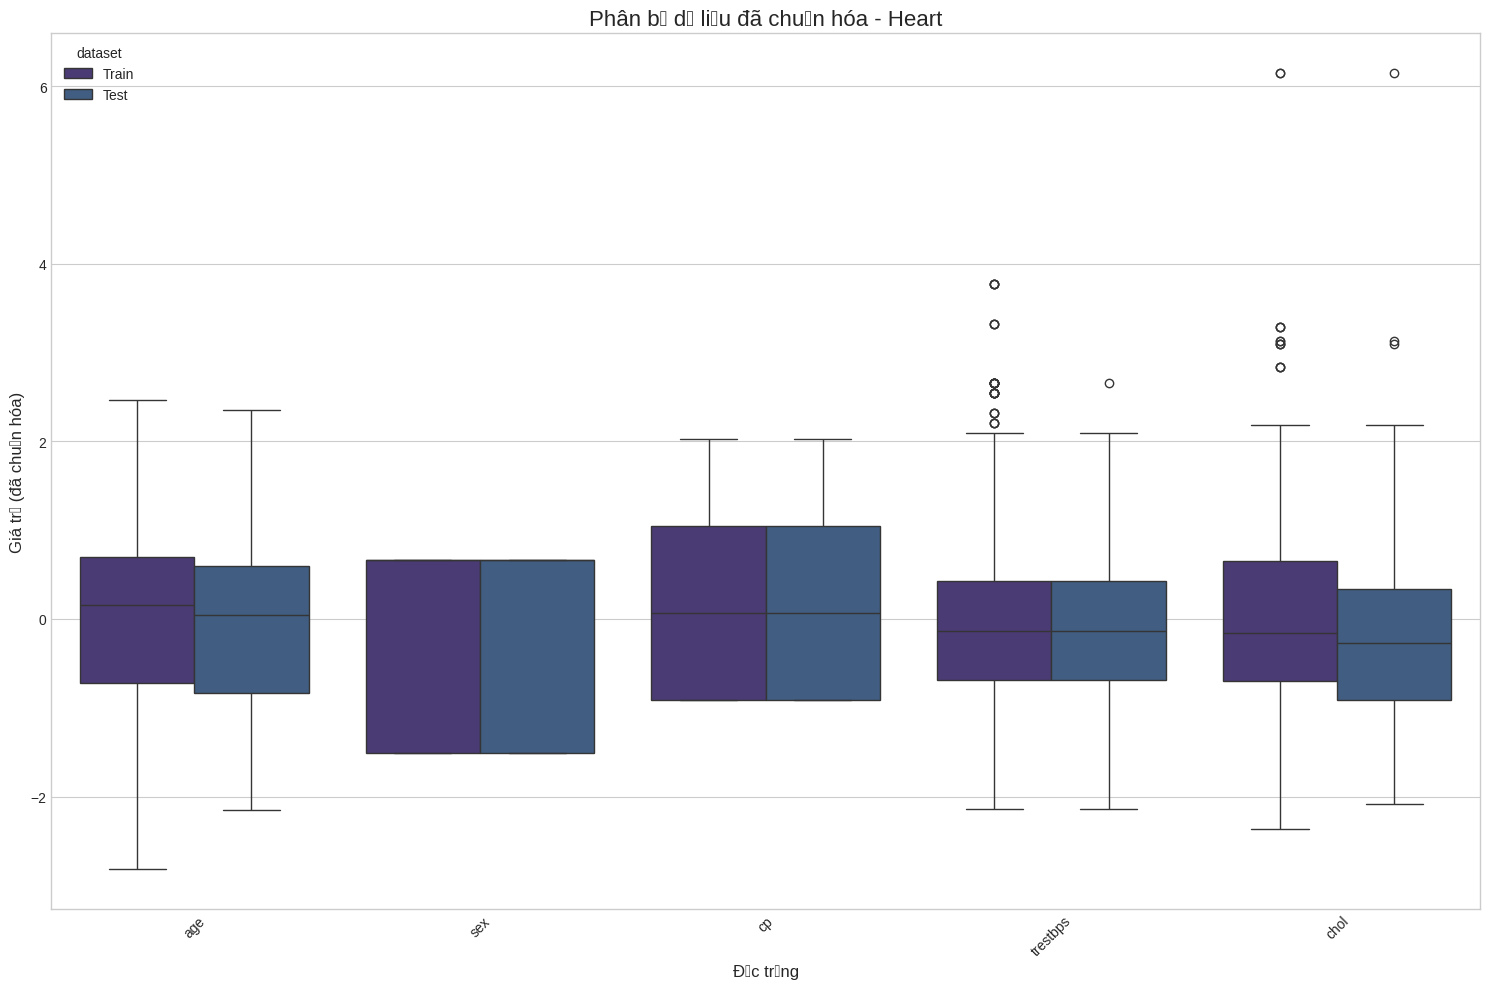

In [63]:
def plot_scaled_data_distribution(X_train_scaled, X_test_scaled, feature_names, dataset_name):
    """
    Vẽ biểu đồ phân bố của dữ liệu đã chuẩn hóa
    """
    # Chọn một số đặc trưng quan trọng để hiển thị
    n_features = min(5, len(feature_names))
    selected_features = list(range(n_features))

    # Chuyển dữ liệu đã chuẩn hóa về dạng DataFrame để dễ thao tác
    X_train_df = pd.DataFrame(X_train_scaled[:, selected_features], columns=feature_names[selected_features])
    X_test_df = pd.DataFrame(X_test_scaled[:, selected_features], columns=feature_names[selected_features])

    # Thêm cột để đánh dấu tập dữ liệu
    X_train_df['dataset'] = 'Train'
    X_test_df['dataset'] = 'Test'

    # Gộp dữ liệu để vẽ biểu đồ
    combined_df = pd.concat([X_train_df, X_test_df])

    # Chuyển dữ liệu về dạng "long form" để vẽ biểu đồ
    melted_df = pd.melt(combined_df, id_vars=['dataset'], var_name='Feature', value_name='Value')

    # Vẽ biểu đồ phân bố
    plt.figure(figsize=(15, 10))
    sns.boxplot(x='Feature', y='Value', hue='dataset', data=melted_df)
    plt.title(f'Phân bố dữ liệu đã chuẩn hóa - {dataset_name}', fontsize=16)
    plt.xlabel('Đặc trưng', fontsize=12)
    plt.ylabel('Giá trị (đã chuẩn hóa)', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f'visualizations/{dataset_name}_scaled_distribution.png')
    plt.show()

# Vẽ phân bố dữ liệu đã chuẩn hóa cho tập Heart
if heart_X_train is not None and heart_X_test is not None:
    # Lấy tên đặc trưng từ dữ liệu gốc, loại bỏ các cột không phải số và cột target
    df_temp = heart_processed.copy()
    # Loại bỏ các cột chứa đối tượng Interval và không phải numeric
    interval_cols = [col for col in df_temp.columns
                     if col != 'target' and (
                         df_temp[col].dtype.name == 'category' or
                         'interval' in str(df_temp[col].dtype).lower() or
                         df_temp[col].dtype == 'object'
                     )]
    if interval_cols:
        df_temp = df_temp.drop(columns=interval_cols)
    heart_feature_names = np.array(df_temp.drop('target', axis=1).columns)
    print("Phân bố dữ liệu Heart sau khi chuẩn hóa:")
    plot_scaled_data_distribution(heart_X_train, heart_X_test, heart_feature_names, 'Heart')



Phân bố dữ liệu Cleveland sau khi chuẩn hóa:


/tmp/ipython-input-63-331528963.py:30: UserWarning: Glyph 7863 (\N{LATIN SMALL LETTER A WITH BREVE AND DOT BELOW}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-63-331528963.py:30: UserWarning: Glyph 432 (\N{LATIN SMALL LETTER U WITH HORN}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-63-331528963.py:30: UserWarning: Glyph 7883 (\N{LATIN SMALL LETTER I WITH DOT BELOW}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-63-331528963.py:30: UserWarning: Glyph 7849 (\N{LATIN SMALL LETTER A WITH CIRCUMFLEX AND HOOK ABOVE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-63-331528963.py:30: UserWarning: Glyph 7889 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX AND ACUTE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-63-331528963.py:30: UserWarning: Glyph 7919 (\N{LATIN SMALL LETTER U WITH HORN AND TILDE}) missing from font(s) Liberation Sans.
 

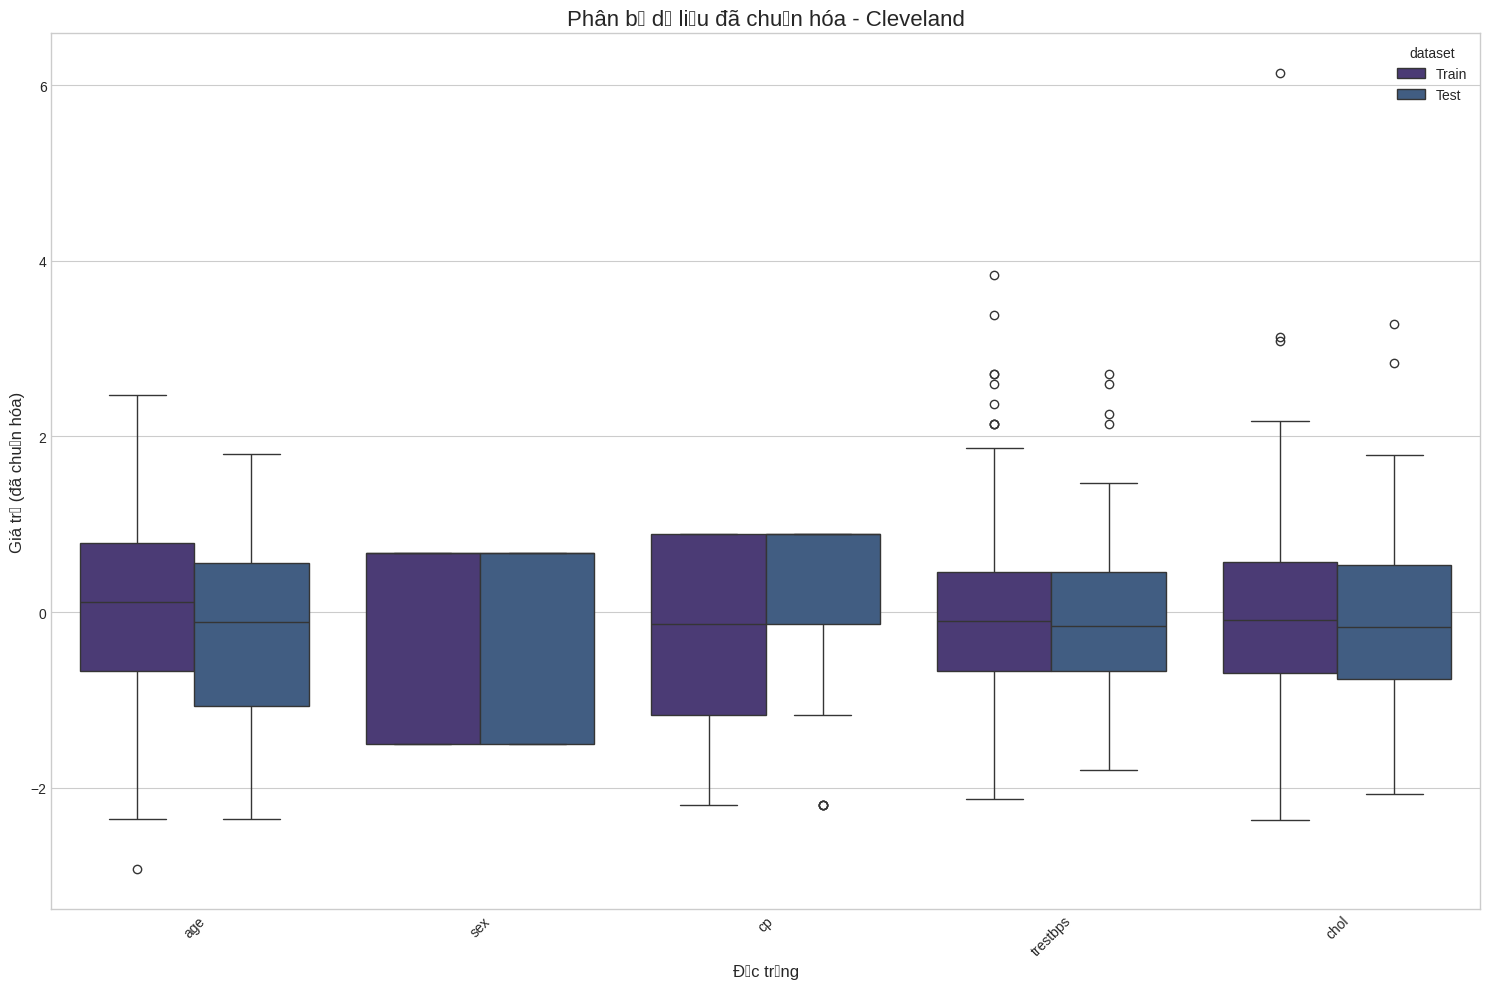


Phân bố dữ liệu UCI sau khi chuẩn hóa:


/tmp/ipython-input-63-331528963.py:30: UserWarning: Glyph 7863 (\N{LATIN SMALL LETTER A WITH BREVE AND DOT BELOW}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-63-331528963.py:30: UserWarning: Glyph 432 (\N{LATIN SMALL LETTER U WITH HORN}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-63-331528963.py:30: UserWarning: Glyph 7883 (\N{LATIN SMALL LETTER I WITH DOT BELOW}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-63-331528963.py:30: UserWarning: Glyph 7849 (\N{LATIN SMALL LETTER A WITH CIRCUMFLEX AND HOOK ABOVE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-63-331528963.py:30: UserWarning: Glyph 7889 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX AND ACUTE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-63-331528963.py:30: UserWarning: Glyph 7919 (\N{LATIN SMALL LETTER U WITH HORN AND TILDE}) missing from font(s) Liberation Sans.
 

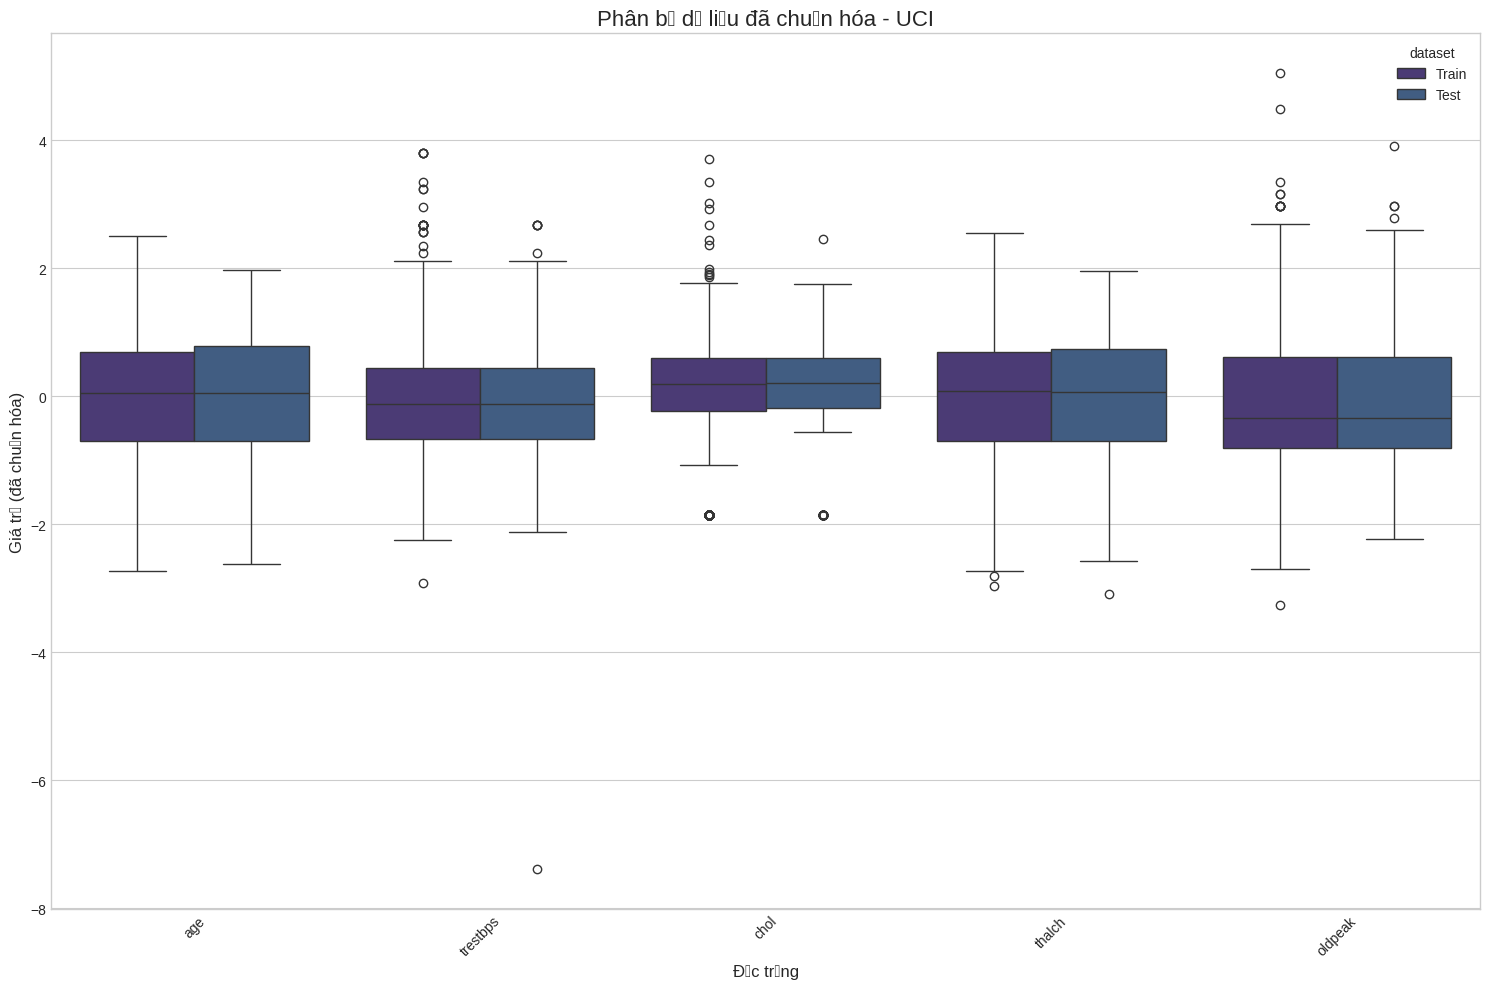

In [64]:
# Vẽ phân bố dữ liệu đã chuẩn hóa cho tập Cleveland
if cleveland_X_train is not None and cleveland_X_test is not None:
    # Lấy tên đặc trưng từ dữ liệu gốc, loại bỏ các cột không phải số và cột target
    df_temp = cleveland_processed.copy()
    # Loại bỏ các cột chứa đối tượng Interval và không phải numeric
    interval_cols = [col for col in df_temp.columns
                     if col != 'target' and (
                         df_temp[col].dtype.name == 'category' or
                         'interval' in str(df_temp[col].dtype).lower() or
                         df_temp[col].dtype == 'object'
                     )]
    if interval_cols:
        df_temp = df_temp.drop(columns=interval_cols)
    cleveland_feature_names = np.array(df_temp.drop('target', axis=1).columns)
    print("\nPhân bố dữ liệu Cleveland sau khi chuẩn hóa:")
    plot_scaled_data_distribution(cleveland_X_train, cleveland_X_test, cleveland_feature_names, 'Cleveland')

# Vẽ phân bố dữ liệu đã chuẩn hóa cho tập UCI
if uci_X_train is not None and uci_X_test is not None:
    # Lấy tên đặc trưng từ dữ liệu gốc, loại bỏ các cột không phải số và cột target
    df_temp = uci_processed.copy()
    # Loại bỏ các cột chứa đối tượng Interval và không phải numeric
    interval_cols = [col for col in df_temp.columns
                     if col != 'target' and (
                         df_temp[col].dtype.name == 'category' or
                         'interval' in str(df_temp[col].dtype).lower() or
                         df_temp[col].dtype == 'object'
                     )]
    if interval_cols:
        df_temp = df_temp.drop(columns=interval_cols)
    uci_feature_names = np.array(df_temp.drop('target', axis=1).columns)
    print("\nPhân bố dữ liệu UCI sau khi chuẩn hóa:")
    plot_scaled_data_distribution(uci_X_train, uci_X_test, uci_feature_names, 'UCI')


Kết hợp dữ liệu từ các nguồn...
Các cột chung giữa các tập dữ liệu: {'cp_1.0', 'chol', 'restecg_0.0', 'target', 'fbs_1.0', 'oldpeak', 'thalach', 'restecg_1.0', 'restecg_2.0', 'thal_0.0', 'trestbps', 'sex_0.0', 'cp_3.0', 'ca_2.0', 'cp_2.0', 'exang_1.0', 'age_group', 'ca_0.0', 'thal_2.0', 'ca_3.0', 'cp_0.0', 'chol_group', 'slope_0.0', 'sex_1.0', 'age', 'exang_0.0', 'fbs_0.0', 'slope_2.0', 'thal_1.0', 'ca_1.0', 'slope_1.0'}
Đã kết hợp 2 tập dữ liệu với 1322 mẫu và 31 đặc trưng chung

Dữ liệu sau khi kết hợp:


cp_1.0   chol  restecg_0.0  target  fbs_1.0  oldpeak  thalach  restecg_1.0  \
0     0.0  212.0          0.0     0.0      0.0      1.0    168.0          1.0   
1     0.0  203.0          1.0     0.0      1.0      3.1    155.0          0.0   
2     0.0  174.0          0.0     0.0      0.0      2.6    125.0          1.0   
3     0.0  203.0          0.0     0.0      0.0      0.0    161.0          1.0   
4     0.0  294.0          0.0     0.0      1.0      1.9    106.0          1.0   

   restecg_2.0  thal_0.0  ...  slope_0.0  sex_1.0   age  exang_0.0  fbs_0.0  \
0          0.0       0.0  ...        0.0      1.0  52.0        1.0      1.0   
1          0.0       0.0  ...        1.0      1.0  53.0        0.0      0.0   
2          0.0       0.0  ...        1.0      1.0  70.0        0.0      1.0   
3          0.0       0.0  ...        0.0      1.0  61.0        1.0      1.0   
4          0.0       0.0  ...        0.0      0.0  62.0        1.0      0.0   

   slope_2.0 thal_1.0  ca_1.0  slope_1.0  source  
0        1.0      0.0     0.0        0.0     NaN  
1        0.0      0.0     0.0        0.0     NaN  
2        0.0      0.0     0.0        0.0     NaN  
3        1.0      0.0     1.0        0.0     NaN  
4        0.0      0.0     0.0        1.0     NaN  

[5 rows x 32 columns]


Trực quan hóa dữ liệu kết hợp:


/tmp/ipython-input-45-1920387873.py:83: UserWarning: Glyph 7847 (\N{LATIN SMALL LETTER A WITH CIRCUMFLEX AND GRAVE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-45-1920387873.py:83: UserWarning: Glyph 7845 (\N{LATIN SMALL LETTER A WITH CIRCUMFLEX AND ACUTE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-45-1920387873.py:83: UserWarning: Glyph 7889 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX AND ACUTE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-45-1920387873.py:83: UserWarning: Glyph 7911 (\N{LATIN SMALL LETTER U WITH HOOK ABOVE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-45-1920387873.py:85: UserWarning: Glyph 7889 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX AND ACUTE}) missing from font(s) Liberation Sans.
  plt.savefig(f'visualizations/{dataset_name}_histograms.png')
/tmp/ipython-input-45-1920387873.py:85: UserWarning: Glyph 7863 (\N{LATIN SMALL LETTER A

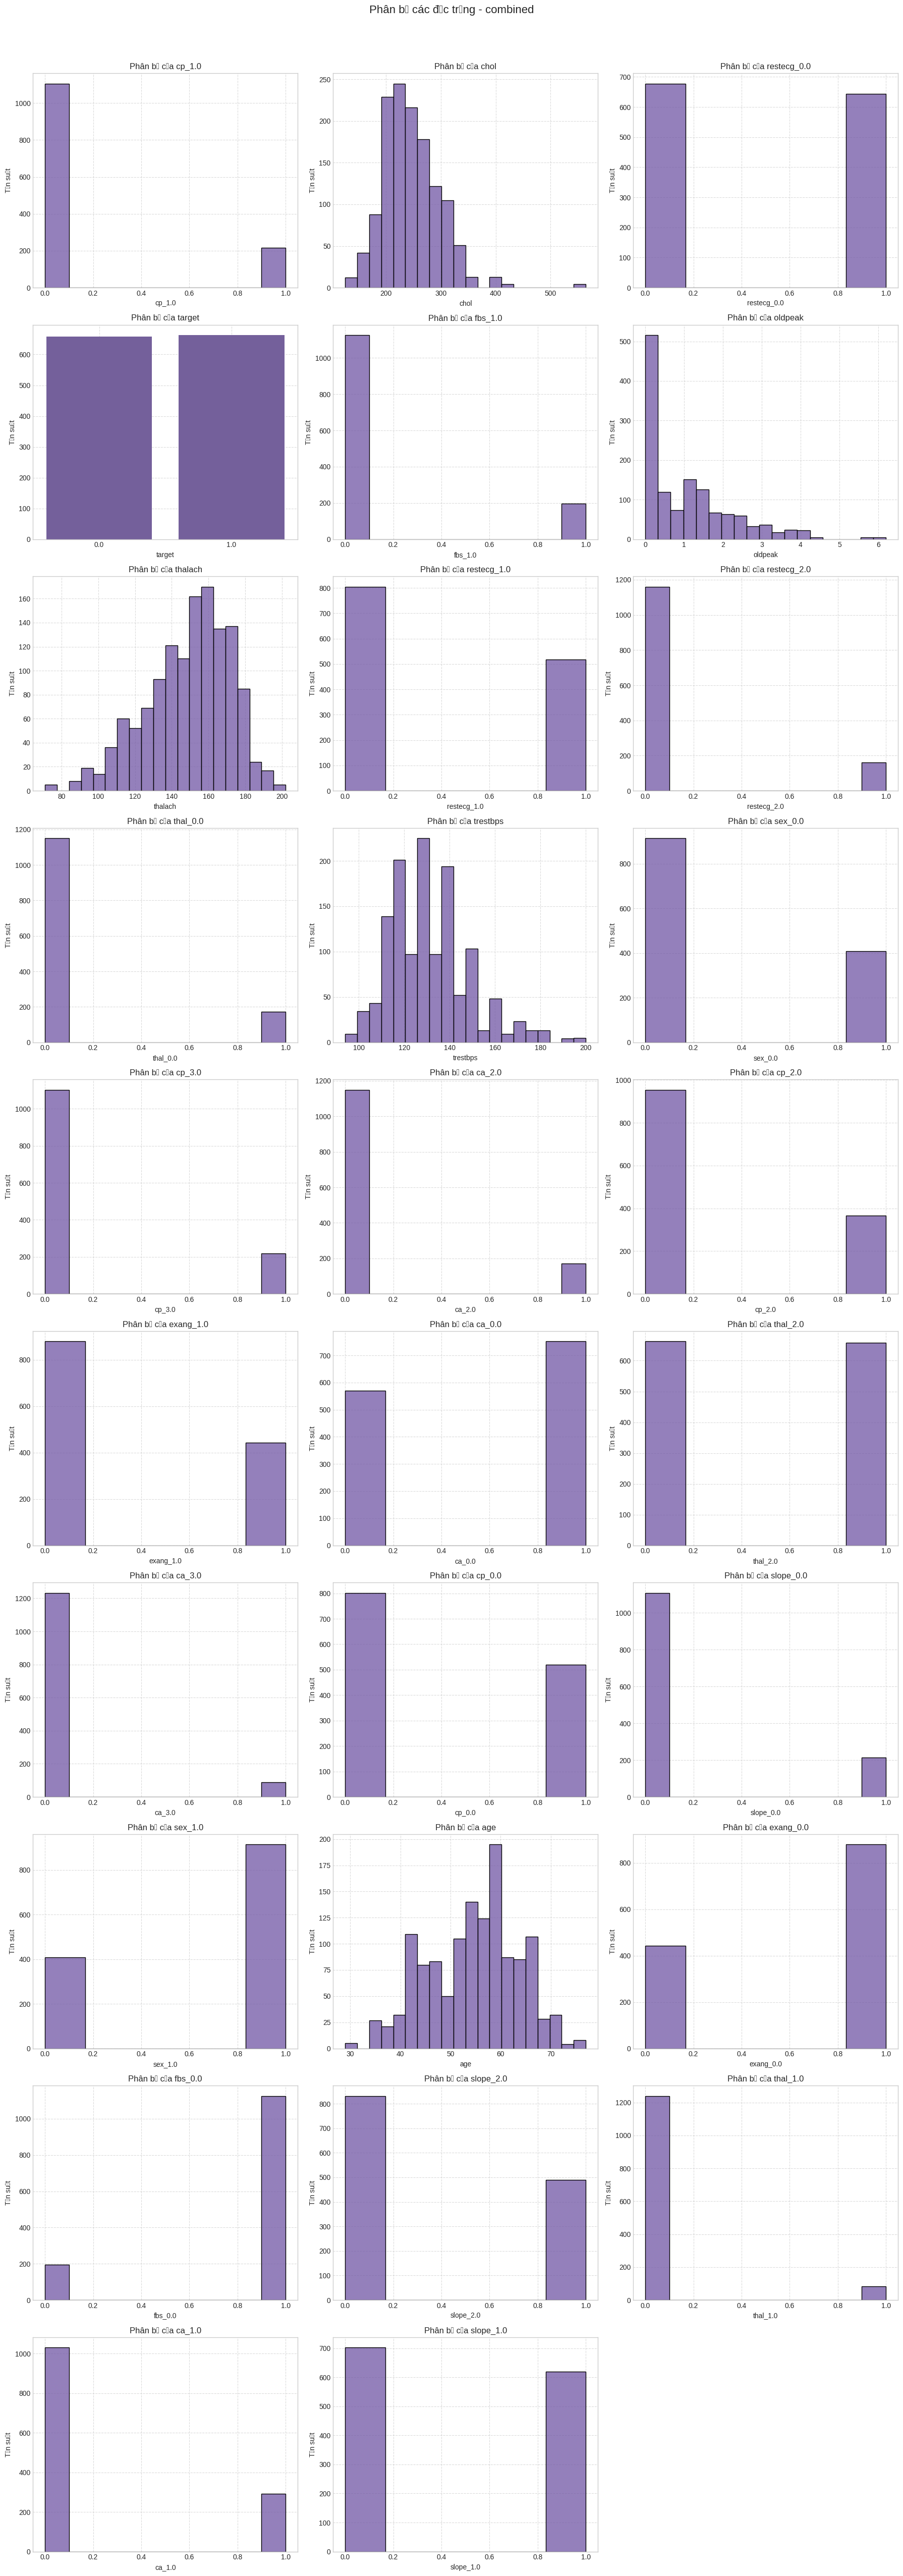

/tmp/ipython-input-51-4171757768.py:20: UserWarning: Glyph 7853 (\N{LATIN SMALL LETTER A WITH CIRCUMFLEX AND DOT BELOW}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-51-4171757768.py:20: UserWarning: Glyph 432 (\N{LATIN SMALL LETTER U WITH HORN}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-51-4171757768.py:20: UserWarning: Glyph 417 (\N{LATIN SMALL LETTER O WITH HORN}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-51-4171757768.py:21: UserWarning: Glyph 7853 (\N{LATIN SMALL LETTER A WITH CIRCUMFLEX AND DOT BELOW}) missing from font(s) Liberation Sans.
  plt.savefig(f'visualizations/{dataset_name}_correlation.png')
/tmp/ipython-input-51-4171757768.py:21: UserWarning: Glyph 432 (\N{LATIN SMALL LETTER U WITH HORN}) missing from font(s) Liberation Sans.
  plt.savefig(f'visualizations/{dataset_name}_correlation.png')
/tmp/ipython-input-51-4171757768.py:21: UserWarning: Glyph 417 (\N{LATIN SMAL

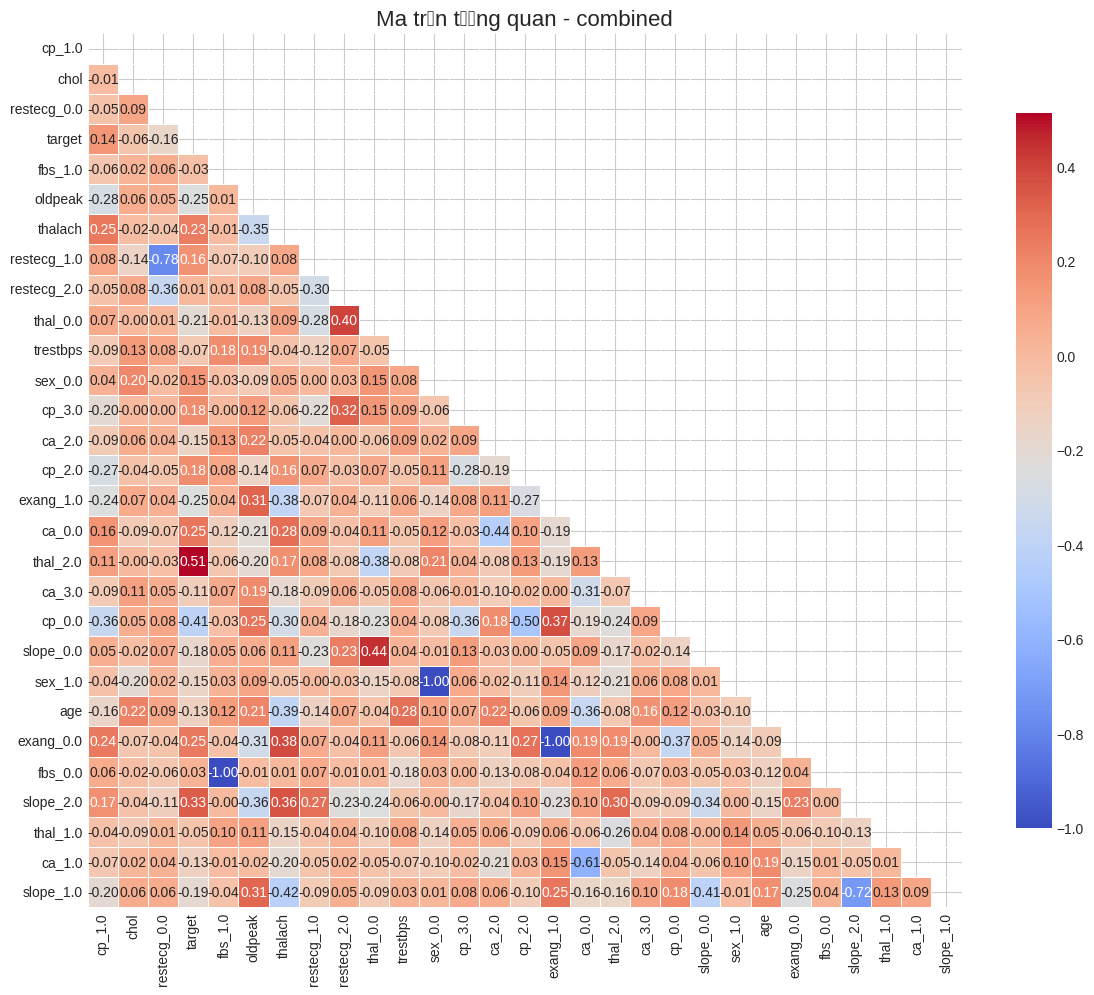


Các cặp đặc trưng có tương quan cao (|r| > 0.5) trong tập dữ liệu combined:
- sex_0.0 và sex_1.0: -1.000
- exang_1.0 và exang_0.0: -1.000
- fbs_1.0 và fbs_0.0: -1.000
- restecg_0.0 và restecg_1.0: -0.781
- slope_2.0 và slope_1.0: -0.720
- ca_0.0 và ca_1.0: -0.610
- target và thal_2.0: 0.513

=== Chia dữ liệu kết hợp ===
Đang chia và chuẩn hóa dữ liệu Combined...
Loại bỏ các cột không phải numeric: ['age_group', 'chol_group', 'source']
Kích thước tập huấn luyện: 1057 mẫu, 28 đặc trưng
Kích thước tập kiểm tra: 265 mẫu, 28 đặc trưng
Phân bố nhãn tập huấn luyện: {1.0: 530, 0.0: 527}
Phân bố nhãn tập kiểm tra: {1.0: 133, 0.0: 132}


In [65]:
def combine_datasets(datasets, dataset_names):
    """
    Kết hợp nhiều tập dữ liệu thành một
    """
    # Kiểm tra xem có đủ dữ liệu không
    if len(datasets) < 2:
        print("Cần ít nhất 2 tập dữ liệu để kết hợp")
        return None

    # Tìm các cột chung giữa các tập dữ liệu
    common_columns = set.intersection(*[set(df.columns) for df in datasets])

    # Kiểm tra xem có cột 'target' không
    if 'target' not in common_columns:
        print("Cột 'target' không có trong tất cả các tập dữ liệu, không thể kết hợp!")
        return None

    print(f"Các cột chung giữa các tập dữ liệu: {common_columns}")

    # Chỉ giữ lại các cột chung và kết hợp dữ liệu
    combined_data = pd.concat([df[list(common_columns)] for df in datasets], ignore_index=True)

    # Thêm cột để đánh dấu nguồn dữ liệu
    for i, (df, name) in enumerate(zip(datasets, dataset_names)):
        combined_data.loc[combined_data.index.isin(range(len(combined_data) - len(df), len(combined_data))), 'source'] = name

    print(f"Đã kết hợp {len(datasets)} tập dữ liệu với {combined_data.shape[0]} mẫu và {len(common_columns)} đặc trưng chung")

    return combined_data

# Thử kết hợp các tập dữ liệu (sử dụng dữ liệu đã mã hóa one-hot)
datasets_to_combine = []
dataset_names = []

if 'target' in heart_encoded.columns:
    datasets_to_combine.append(heart_encoded)
    dataset_names.append('Heart')

if 'target' in cleveland_encoded.columns:
    datasets_to_combine.append(cleveland_encoded)
    dataset_names.append('Cleveland')

print("Kết hợp dữ liệu từ các nguồn...")
combined_df = combine_datasets(datasets_to_combine, dataset_names)

if combined_df is not None:
    print("\nDữ liệu sau khi kết hợp:")
    display(combined_df.head())

    # Trực quan hóa dữ liệu kết hợp
    print("\nTrực quan hóa dữ liệu kết hợp:")
    plot_histograms(combined_df, 'combined')
    plot_correlation_matrix(combined_df, 'combined')

    # Chia dữ liệu kết hợp
    print("\n=== Chia dữ liệu kết hợp ===")
    combined_X_train, combined_X_test, combined_y_train, combined_y_test, combined_scaler = split_and_scale_data(combined_df, 'Combined')


In [66]:
def save_processed_data(X_train, X_test, y_train, y_test, dataset_name):
    """
    Lưu dữ liệu đã xử lý vào thư mục processed_data
    """
    if X_train is None or X_test is None or y_train is None or y_test is None:
        print(f"Không thể lưu dữ liệu {dataset_name} do thiếu dữ liệu")
        return

    # Tạo thư mục nếu chưa tồn tại
    if not os.path.exists('processed_data'):
        os.makedirs('processed_data')

    # Lưu dữ liệu
    np.save(f'processed_data/{dataset_name.lower()}_X_train.npy', X_train)
    np.save(f'processed_data/{dataset_name.lower()}_X_test.npy', X_test)
    np.save(f'processed_data/{dataset_name.lower()}_y_train.npy', y_train)
    np.save(f'processed_data/{dataset_name.lower()}_y_test.npy', y_test)

    print(f"Đã lưu dữ liệu {dataset_name} vào thư mục processed_data")

# Lưu dữ liệu Heart
save_processed_data(heart_X_train, heart_X_test, heart_y_train, heart_y_test, 'heart')

# Lưu dữ liệu Cleveland
save_processed_data(cleveland_X_train, cleveland_X_test, cleveland_y_train, cleveland_y_test, 'cleveland')

# Lưu dữ liệu UCI
save_processed_data(uci_X_train, uci_X_test, uci_y_train, uci_y_test, 'uci')

# Lưu dữ liệu Combined (nếu có)
if 'combined_X_train' in locals() and combined_X_train is not None:
    save_processed_data(combined_X_train, combined_X_test, combined_y_train, combined_y_test, 'combined')


Đã lưu dữ liệu heart vào thư mục processed_data
Đã lưu dữ liệu cleveland vào thư mục processed_data
Đã lưu dữ liệu uci vào thư mục processed_data
Đã lưu dữ liệu combined vào thư mục processed_data


Tổng kết về các tập dữ liệu:


Tập dữ liệu  Số lượng mẫu  Số lượng đặc trưng  Tỷ lệ mắc bệnh
0       Heart          1025                  15        0.513171
1   Cleveland           297                  15        0.461279
2         UCI           920                  21        0.553261
3    Combined          1322                  31        0.501513

/tmp/ipython-input-67-1676833092.py:34: UserWarning: Glyph 7889 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX AND ACUTE}) missing from font(s) Liberation Sans.
  plt.savefig('visualizations/datasets_size_comparison.png')
/tmp/ipython-input-67-1676833092.py:34: UserWarning: Glyph 432 (\N{LATIN SMALL LETTER U WITH HORN}) missing from font(s) Liberation Sans.
  plt.savefig('visualizations/datasets_size_comparison.png')
/tmp/ipython-input-67-1676833092.py:34: UserWarning: Glyph 7907 (\N{LATIN SMALL LETTER O WITH HORN AND DOT BELOW}) missing from font(s) Liberation Sans.
  plt.savefig('visualizations/datasets_size_comparison.png')
/tmp/ipython-input-67-1676833092.py:34: UserWarning: Glyph 7851 (\N{LATIN SMALL LETTER A WITH CIRCUMFLEX AND TILDE}) missing from font(s) Liberation Sans.
  plt.savefig('visualizations/datasets_size_comparison.png')
/tmp/ipython-input-67-1676833092.py:34: UserWarning: Glyph 7899 (\N{LATIN SMALL LETTER O WITH HORN AND ACUTE}) missing from font(s) Liberation Sans.
  plt.

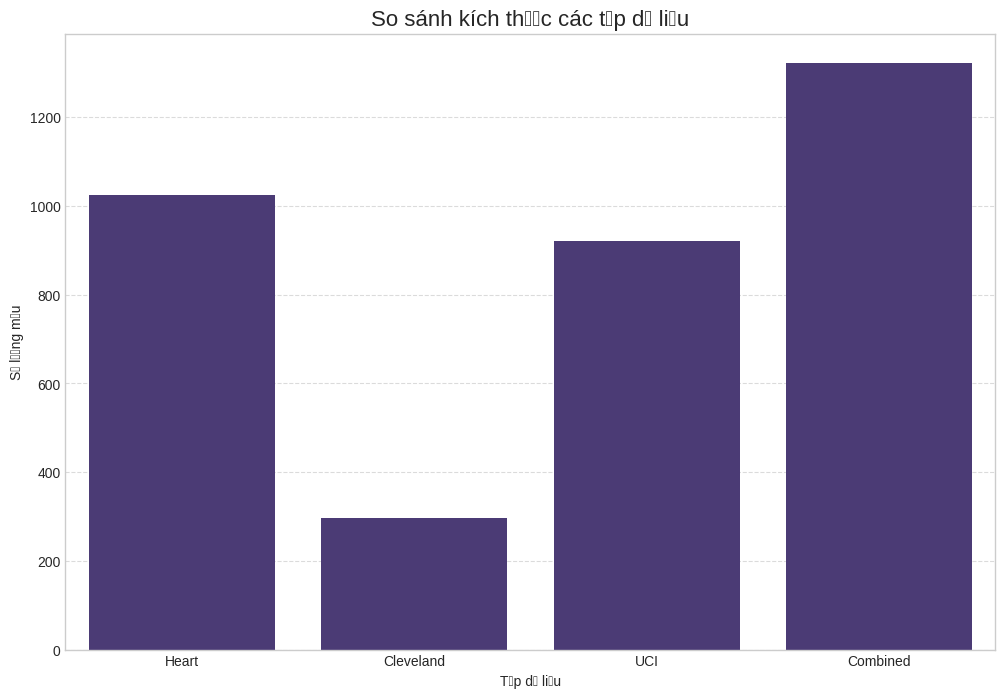

/tmp/ipython-input-67-1676833092.py:44: UserWarning: Glyph 7927 (\N{LATIN SMALL LETTER Y WITH HOOK ABOVE}) missing from font(s) Liberation Sans.
  plt.savefig('visualizations/disease_rate_comparison.png')
/tmp/ipython-input-67-1676833092.py:44: UserWarning: Glyph 7879 (\N{LATIN SMALL LETTER E WITH CIRCUMFLEX AND DOT BELOW}) missing from font(s) Liberation Sans.
  plt.savefig('visualizations/disease_rate_comparison.png')
/tmp/ipython-input-67-1676833092.py:44: UserWarning: Glyph 7855 (\N{LATIN SMALL LETTER A WITH BREVE AND ACUTE}) missing from font(s) Liberation Sans.
  plt.savefig('visualizations/disease_rate_comparison.png')
/tmp/ipython-input-67-1676833092.py:44: UserWarning: Glyph 7919 (\N{LATIN SMALL LETTER U WITH HORN AND TILDE}) missing from font(s) Liberation Sans.
  plt.savefig('visualizations/disease_rate_comparison.png')
/tmp/ipython-input-67-1676833092.py:44: UserWarning: Glyph 7853 (\N{LATIN SMALL LETTER A WITH CIRCUMFLEX AND DOT BELOW}) missing from font(s) Liberation Sans

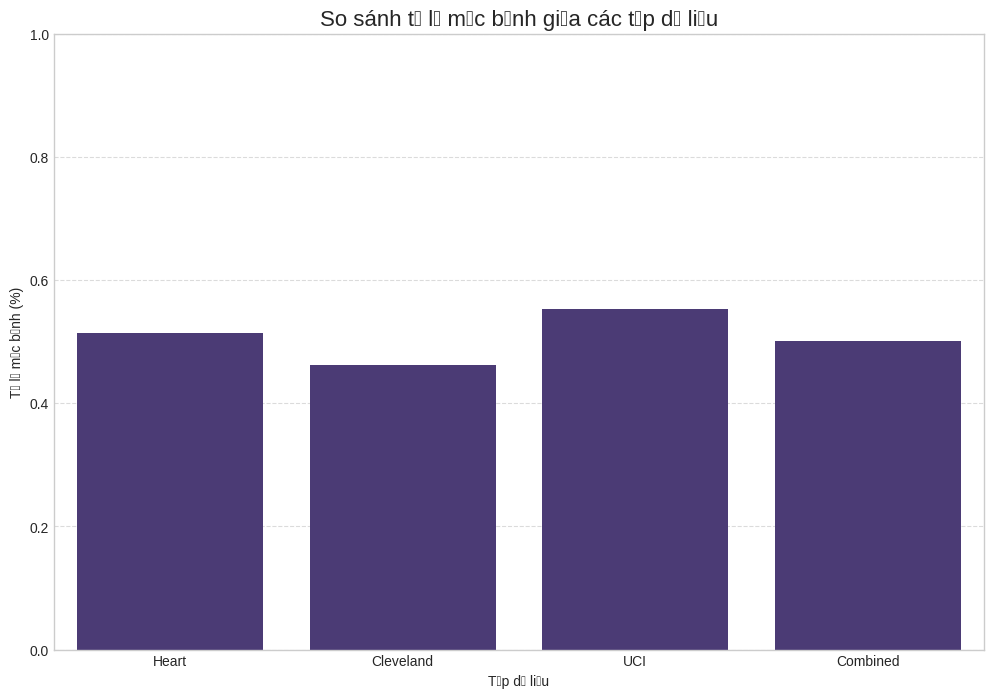


Quá trình tiền xử lý dữ liệu đã hoàn tất!
- Dữ liệu đã được làm sạch, xử lý giá trị thiếu và chuẩn hóa
- Đã chia tập dữ liệu thành tập huấn luyện (80%) và tập kiểm tra (20%)
- Các tập dữ liệu đã được lưu vào thư mục processed_data để sử dụng cho việc huấn luyện mô hình
- Các biểu đồ trực quan hóa đã được lưu vào thư mục visualizations


In [67]:
# Thống kê về các tập dữ liệu
data_stats = pd.DataFrame({
    'Tập dữ liệu': ['Heart', 'Cleveland', 'UCI', 'Combined'],
    'Số lượng mẫu': [
        heart_processed.shape[0] if 'heart_processed' in locals() else 0,
        cleveland_processed.shape[0] if 'cleveland_processed' in locals() else 0,
        uci_processed.shape[0] if 'uci_processed' in locals() else 0,
        combined_df.shape[0] if 'combined_df' in locals() else 0
    ],
    'Số lượng đặc trưng': [
        heart_processed.shape[1] - 1 if 'heart_processed' in locals() else 0,  # Trừ đi cột target
        cleveland_processed.shape[1] - 1 if 'cleveland_processed' in locals() else 0,
        uci_processed.shape[1] - 1 if 'uci_processed' in locals() else 0,
        combined_df.shape[1] - 1 if 'combined_df' in locals() else 0
    ],
    'Tỷ lệ mắc bệnh': [
        heart_processed['target'].mean() if 'heart_processed' in locals() else 0,
        cleveland_processed['target'].mean() if 'cleveland_processed' in locals() else 0,
        uci_processed['target'].mean() if 'uci_processed' in locals() else 0,
        combined_df['target'].mean() if 'combined_df' in locals() else 0
    ]
})

# Hiển thị bảng thống kê
print("Tổng kết về các tập dữ liệu:")
display(data_stats)

# Tạo biểu đồ so sánh
plt.figure(figsize=(12, 8))
sns.barplot(x='Tập dữ liệu', y='Số lượng mẫu', data=data_stats)
plt.title('So sánh kích thước các tập dữ liệu', fontsize=16)
plt.ylabel('Số lượng mẫu')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('visualizations/datasets_size_comparison.png')
plt.show()

# Vẽ biểu đồ tỷ lệ mắc bệnh
plt.figure(figsize=(12, 8))
sns.barplot(x='Tập dữ liệu', y='Tỷ lệ mắc bệnh', data=data_stats)
plt.title('So sánh tỷ lệ mắc bệnh giữa các tập dữ liệu', fontsize=16)
plt.ylabel('Tỷ lệ mắc bệnh (%)')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('visualizations/disease_rate_comparison.png')
plt.show()

print("\nQuá trình tiền xử lý dữ liệu đã hoàn tất!")
print("- Dữ liệu đã được làm sạch, xử lý giá trị thiếu và chuẩn hóa")
print("- Đã chia tập dữ liệu thành tập huấn luyện (80%) và tập kiểm tra (20%)")
print("- Các tập dữ liệu đã được lưu vào thư mục processed_data để sử dụng cho việc huấn luyện mô hình")
print("- Các biểu đồ trực quan hóa đã được lưu vào thư mục visualizations")


Biểu đồ Scatter cho tập dữ liệu UCI:
Đang xử lý dữ liệu UCI...
Đang xử lý giá trị thiếu...
Đã xử lý giá trị thiếu trong 8 cột phân loại
Đã tạo cột 'target' từ cột 'num' và chuyển về dạng nhị phân (0/1)
Đã loại bỏ cột 'id'
Đang mã hóa 8 biến phân loại...

Số lượng mẫu: 920
Số lượng đặc trưng: 21
Phân bố nhãn: {1: 509, 0: 411}


/tmp/ipython-input-68-216113671.py:117: UserWarning: Glyph 7879 (\N{LATIN SMALL LETTER E WITH CIRCUMFLEX AND DOT BELOW}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-68-216113671.py:119: UserWarning: Glyph 7889 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX AND ACUTE}) missing from font(s) Liberation Sans.
  plt.savefig(f'visualizations/{dataset_name}_scatter_plots.png')
/tmp/ipython-input-68-216113671.py:119: UserWarning: Glyph 7879 (\N{LATIN SMALL LETTER E WITH CIRCUMFLEX AND DOT BELOW}) missing from font(s) Liberation Sans.
  plt.savefig(f'visualizations/{dataset_name}_scatter_plots.png')
/tmp/ipython-input-68-216113671.py:119: UserWarning: Glyph 7919 (\N{LATIN SMALL LETTER U WITH HORN AND TILDE}) missing from font(s) Liberation Sans.
  plt.savefig(f'visualizations/{dataset_name}_scatter_plots.png')
/tmp/ipython-input-68-216113671.py:119: UserWarning: Glyph 7863 (\N{LATIN SMALL LETTER A WITH BREVE AND DOT BELOW}) missing from font(s) Liberation Sans.
  plt

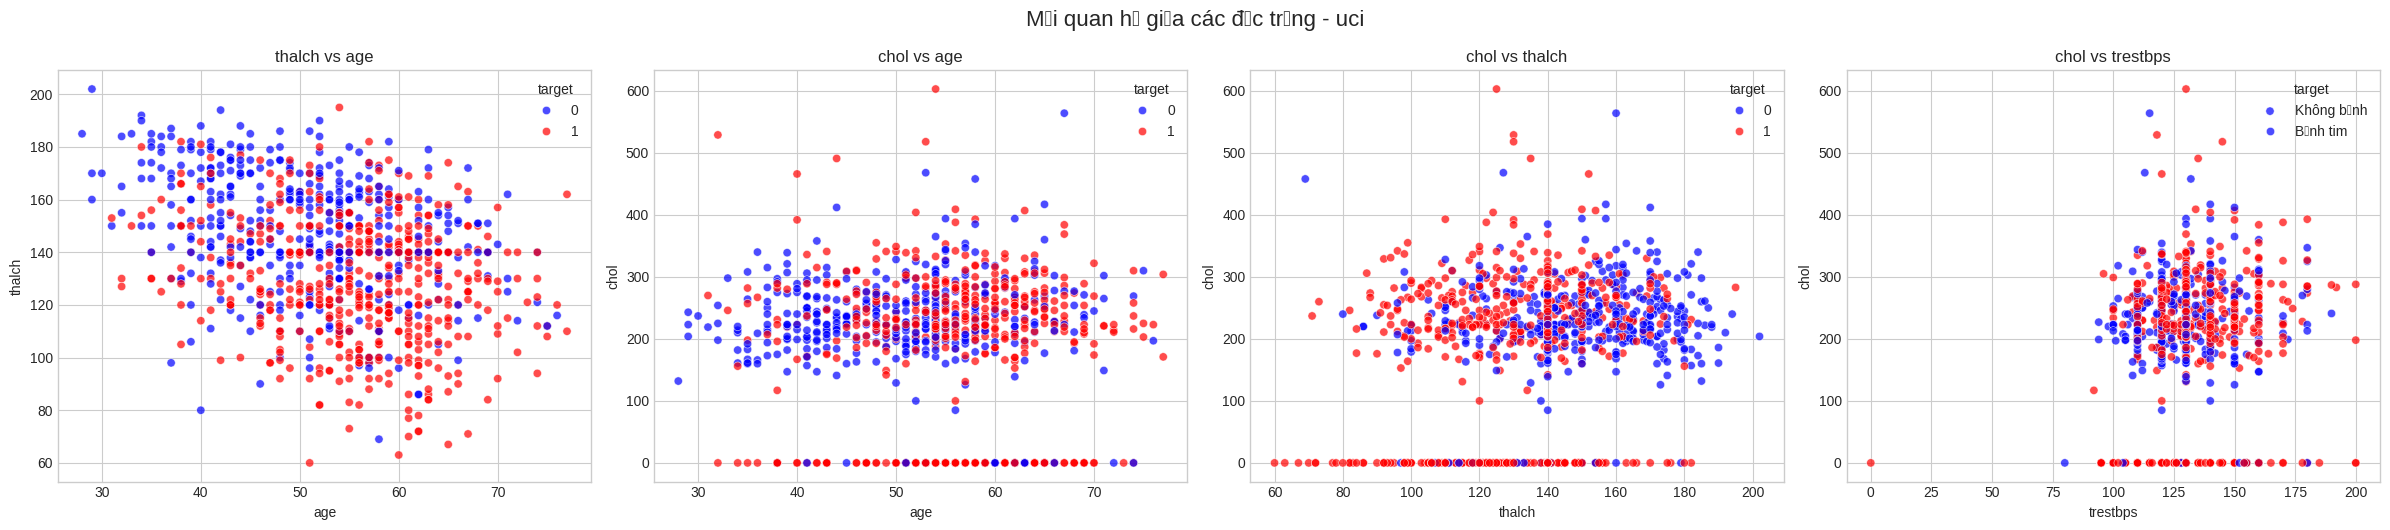

In [68]:
# Redefine preprocess_uci_data to ensure it's available
def preprocess_uci_data(df):
    """
    Tiền xử lý dữ liệu từ tập UCI
    """
    print("Đang xử lý dữ liệu UCI...")

    # Tạo bản sao để không ảnh hưởng đến dữ liệu gốc
    data = df.copy()

    # Xử lý giá trị thiếu
    if data.isnull().sum().sum() > 0:
        print("Đang xử lý giá trị thiếu...")
        # Xử lý các cột số
        numeric_features = data.select_dtypes(include=['int64', 'float64']).columns
        numeric_imputer = SimpleImputer(strategy='median')
        data[numeric_features] = numeric_imputer.fit_transform(data[numeric_features])

        # Xử lý các cột phân loại
        categorical_features = data.select_dtypes(include=['object']).columns
        if len(categorical_features) > 0:
            categorical_imputer = SimpleImputer(strategy='most_frequent')
            data[categorical_features] = categorical_imputer.fit_transform(data[categorical_features])
            print(f"Đã xử lý giá trị thiếu trong {len(categorical_features)} cột phân loại")
    else:
        print("Không có giá trị thiếu trong dữ liệu UCI")

    # Xử lý cột target (nếu có cột 'num')
    if 'num' in data.columns:
        # Chuyển thành dạng nhị phân: 0 = không bệnh (0), 1 = có bệnh (1-4)
        data['target'] = data['num'].apply(lambda x: 0 if x == 0 else 1)
        data = data.drop('num', axis=1)
        print("Đã tạo cột 'target' từ cột 'num' và chuyển về dạng nhị phân (0/1)")

    # Loại bỏ các cột không cần thiết
    if 'id' in data.columns:
        data = data.drop('id', axis=1)
        print("Đã loại bỏ cột 'id'")

    # Mã hóa các biến phân loại
    categorical_features = data.select_dtypes(include=['object']).columns
    if len(categorical_features) > 0:
        print(f"Đang mã hóa {len(categorical_features)} biến phân loại...")
        # One-hot encoding cho các biến phân loại
        encoded_data = pd.get_dummies(data[categorical_features], drop_first=True)

        # Loại bỏ các cột phân loại gốc và thêm các cột đã mã hóa
        data = data.drop(categorical_features, axis=1)
        data = pd.concat([data, encoded_data], axis=1)

    # Hiển thị thông tin về đặc trưng và nhãn
    if 'target' in data.columns:
        features = data.drop('target', axis=1)
        target = data['target']
        print(f"\nSố lượng mẫu: {data.shape[0]}")
        print(f"Số lượng đặc trưng: {features.shape[1]}")
        print(f"Phân bố nhãn: {target.value_counts().to_dict()}")
    else:
        print("\nKhông tìm thấy cột 'target' trong dữ liệu UCI sau khi tiền xử lý")

    return data

# Redefine plot_scatter_relationships to ensure it's available
def plot_scatter_relationships(df, dataset_name):
    """
    Vẽ scatter plots giữa các cặp đặc trưng quan trọng
    """
    # Lựa chọn một số đặc trưng quan trọng
    key_features = []

    # Xác định đặc trưng đích
    target_col = 'target' if 'target' in df.columns else 'condition'

    # Xác định các đặc trưng số quan trọng dựa trên tập dữ liệu
    if 'age' in df.columns and 'thalch' in df.columns:
        key_features.append(('age', 'thalch'))

    if 'age' in df.columns and 'chol' in df.columns:
        key_features.append(('age', 'chol'))

    if 'thalch' in df.columns and 'chol' in df.columns:
        key_features.append(('thalch', 'chol'))

    if 'trestbps' in df.columns and 'chol' in df.columns:
        key_features.append(('trestbps', 'chol'))

    if len(key_features) == 0:
        print(f"Không tìm thấy các cặp đặc trưng phù hợp trong tập dữ liệu {dataset_name}")
        return

    # Vẽ scatter plots
    fig, axes = plt.subplots(1, len(key_features), figsize=(6*len(key_features), 5))
    if len(key_features) == 1:
        axes = [axes]

    for i, (x_feature, y_feature) in enumerate(key_features):
        # Check if the feature exists in the dataframe before plotting
        if x_feature in df.columns and y_feature in df.columns and target_col in df.columns:
             sns.scatterplot(
                data=df,
                x=x_feature,
                y=y_feature,
                hue=target_col,
                palette=['blue', 'red'],
                alpha=0.7,
                ax=axes[i]
            )
             axes[i].set_title(f'{y_feature} vs {x_feature}')
             axes[i].set_xlabel(x_feature)
             axes[i].set_ylabel(y_feature)
             if i == len(key_features) - 1:  # Chỉ hiển thị legend cho biểu đồ cuối cùng
                axes[i].legend(['Không bệnh', 'Bệnh tim'], title=target_col)
        else:
            print(f"Skipping plot for {x_feature} vs {y_feature} as one or more columns are missing.")
            axes[i].set_visible(False) # Hide the empty subplot

    plt.tight_layout()
    plt.suptitle(f'Mối quan hệ giữa các đặc trưng - {dataset_name}', fontsize=16, y=1.05)
    plt.savefig(f'visualizations/{dataset_name}_scatter_plots.png')
    plt.show()


print("Biểu đồ Scatter cho tập dữ liệu UCI:")

# Ensure uci_processed is defined by running the preprocessing step
uci_processed = preprocess_uci_data(uci_df)

# Use the processed UCI dataframe which contains the 'target' column
plot_scatter_relationships(uci_processed, 'uci')

In [69]:
!zip -r processed_data.zip processed_data
!zip -r sample_data.zip sample_data
!zip -r visualizations.zip visualizations


  adding: processed_data/ (stored 0%)
  adding: processed_data/uci_y_test.npy (deflated 90%)
  adding: processed_data/heart_X_train.npy (deflated 87%)
  adding: processed_data/cleveland_y_train.npy (deflated 91%)
  adding: processed_data/uci_X_test.npy (deflated 86%)
  adding: processed_data/cleveland_X_test.npy (deflated 67%)
  adding: processed_data/heart_X_test.npy (deflated 79%)
  adding: processed_data/heart_y_train.npy (deflated 94%)
  adding: processed_data/uci_X_train.npy (deflated 91%)
  adding: processed_data/combined_X_test.npy (deflated 89%)
  adding: processed_data/uci_y_train.npy (deflated 94%)
  adding: processed_data/combined_y_train.npy (deflated 95%)
  adding: processed_data/cleveland_y_test.npy (deflated 84%)
  adding: processed_data/combined_X_train.npy (deflated 93%)
  adding: processed_data/combined_y_test.npy (deflated 92%)
  adding: processed_data/cleveland_X_train.npy (deflated 79%)
  adding: processed_data/heart_y_test.npy (deflated 91%)
  adding: sample_data/